# Global Power Plant Database

### Problem Statement:

#### Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

In [1]:
# Importing the Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset:

dfs=pd.read_csv("global-powerplant-database.csv")
dfs

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Checking the top 5 rows

dfs.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
# Checking the bottom 5 rows

dfs.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Checking the information of data

dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

# Exploratory Data Analysis

In [6]:
# Checking the statistical summary of data

dfs.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [7]:
# Checking all the Statistical summary of data

dfs.describe(include='all')

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
count,907,907,907,907,907.000000,861.000000,861.000000,907,198,1,...,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,449,0.0
unique,1,1,907,907,NaN,NaN,NaN,8,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,IND,India,BHAWANI KATTALAI -II,WRI1026753,NaN,NaN,NaN,Coal,Oil,Oil,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Central Electricity Authority,NaN
freq,907,907,1,1,NaN,NaN,NaN,258,195,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,449,NaN
mean,NaN,NaN,NaN,NaN,326.223755,21.197918,77.464907,NaN,NaN,NaN,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,590.085456,6.239612,4.939316,NaN,NaN,NaN,...,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,8.168900,68.644700,NaN,NaN,NaN,...,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,16.725000,16.773900,74.256200,NaN,NaN,NaN,...,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,59.200000,21.780000,76.719500,NaN,NaN,NaN,...,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,385.250000,25.512400,79.440800,NaN,NaN,NaN,...,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN,NaN


In [8]:
# Checking the shape of data

dfs.shape

(907, 27)

There are 907 rows and 27 columns

In [9]:
# Checking the datatypes

dfs.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [10]:
# Checking the count of capacity_mw

dfs['capacity_mw'].value_counts()

5.0       39
10.0      22
15.0      20
600.0     20
1200.0    19
          ..
192.0      1
27.3       1
26.4       1
68.8       1
19.7       1
Name: capacity_mw, Length: 361, dtype: int64

In [11]:
#Checking the unique value in capacity_mw
dfs['capacity_mw'].nunique()

361

In [12]:
# Checking the count of Primary fuel
dfs['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [13]:
# Checking the unique value in Primary fuel
dfs['primary_fuel'].nunique()

8

In [14]:
dfs['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [15]:
# Checking the column names

dfs.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [16]:
dfs['url']

# URL doesn't contribute anything in data. We can drop the URL

dfs=dfs.drop("url",axis=1)
dfs.shape

(907, 26)

In [17]:
# Checking the Null value

dfs.isnull()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,True,...,False,True,False,False,False,False,False,True,False,True
4,False,False,False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,False,False,False,False,False,False,False,False,False,True,...,False,True,True,False,False,False,False,True,False,True
903,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
904,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
905,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True


In [18]:
dfs.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

There are lots of null value present in data

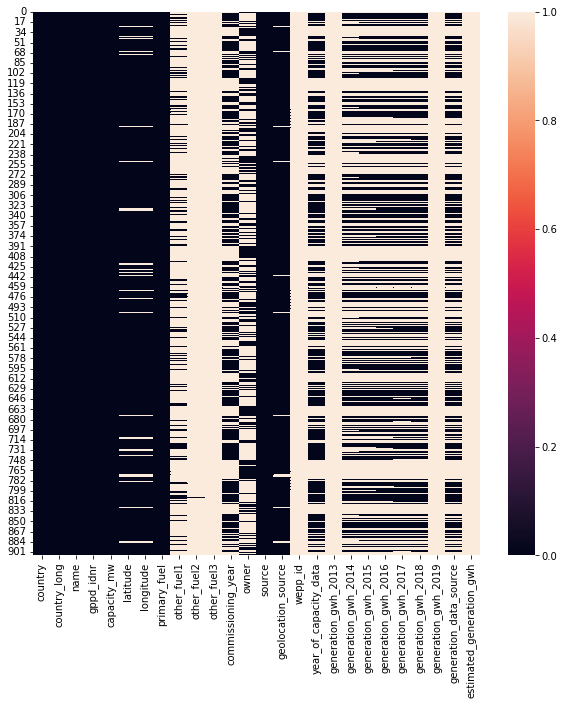

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(dfs.isnull())

In [20]:
# We can drop the irrelavent columns from dataset which doesn't contribute.

dfs=dfs.drop(columns=['gppd_idnr','owner','generation_data_source','country','country_long','year_of_capacity_data'],axis=1)
dfs.head()


,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,source,geolocation_source,wepp_id,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,Central Electricity Authority,WRI,NaN,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,NaN
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,Central Electricity Authority,WRI,NaN,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,NaN


In [21]:
dfs.shape

(907, 20)

In [22]:
dfs.isnull().sum()

name                          0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
source                        0
geolocation_source           19
wepp_id                     907
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
estimated_generation_gwh    907
dtype: int64

In [23]:
dfs['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [24]:
# As we see geolocation_scource is categorical data, so we can fill the missing values with mode.
dfs['geolocation_source'].fillna(dfs['geolocation_source'].mode()[0],inplace=True)

In [25]:
dfs.isnull().sum() # Missing value in geolocaion_source is filled with mode value

name                          0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
source                        0
geolocation_source            0
wepp_id                     907
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
estimated_generation_gwh    907
dtype: int64

In [26]:
dfs.dtypes

name                         object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
source                       object
geolocation_source           object
wepp_id                     float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
estimated_generation_gwh    float64
dtype: object

In [27]:
# In Numerical daa we can fill the median values

dfs.fillna(dfs.median()[0],inplace=True)

In [28]:
dfs.isnull().sum()

name                        0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1                 0
other_fuel2                 0
other_fuel3                 0
commissioning_year          0
source                      0
geolocation_source          0
wepp_id                     0
generation_gwh_2013         0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018         0
generation_gwh_2019         0
estimated_generation_gwh    0
dtype: int64

We have filled all the missing values, no missing values present in the data

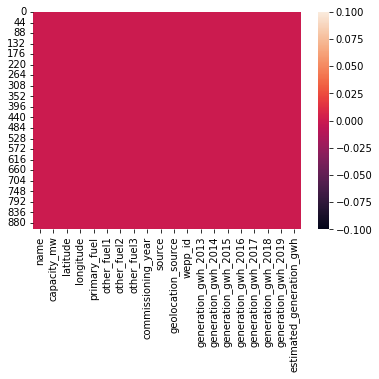

In [29]:
sns.heatmap(dfs.isnull())

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


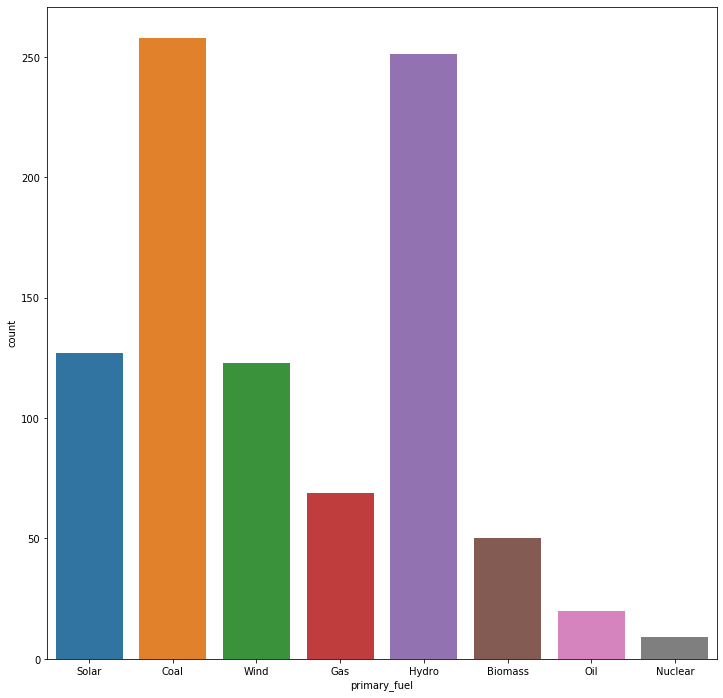

In [30]:
print(dfs['primary_fuel'].value_counts())
plt.figure(figsize=(12,12))
sns.countplot(dfs['primary_fuel'])

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9

In [31]:
# Lets drop the wepp_id column
dfs=dfs.drop('wepp_id',axis=1)

In [32]:
dfs.shape

(907, 19)

In [33]:
dfs.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,59.2,59.2,59.2,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,59.2,59.200000,59.200,59.200000,59.200000,59.200000,59.2,59.2
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,59.2,59.2,59.2,59.2,Ultratech Cement ltd,WRI,59.2,59.200000,59.200,59.200000,59.200000,59.200000,59.2,59.2
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,59.2,59.2,59.2,59.2,CDM,WRI,59.2,59.200000,59.200,59.200000,59.200000,59.200000,59.2,59.2
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,59.2,59.2,59.2,2004.0,Central Electricity Authority,WRI,59.2,617.789264,843.747,886.004428,663.774500,626.239128,59.2,59.2
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,59.2,59.2,2015.0,Central Electricity Authority,WRI,59.2,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,59.2,59.2


# Correlation

In [34]:
dfs_corr=dfs.corr()
dfs_corr

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
capacity_mw,1.000000,-0.053917,0.216974,NaN,0.414775,NaN,0.814674,0.841468,0.875369,0.892899,0.905488,NaN,NaN
latitude,-0.053917,1.000000,-0.500920,NaN,0.088458,NaN,-0.029067,-0.030007,-0.031473,-0.024888,-0.028212,NaN,NaN
longitude,0.216974,-0.500920,1.000000,NaN,0.294825,NaN,0.160584,0.170438,0.186348,0.199703,0.199273,NaN,NaN
other_fuel3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commissioning_year,0.414775,0.088458,0.294825,NaN,1.000000,NaN,0.304853,0.304534,0.316274,0.325603,0.327190,NaN,NaN
generation_gwh_2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,0.814674,-0.029067,0.160584,NaN,0.304853,NaN,1.000000,0.966673,0.937892,0.907541,0.898658,NaN,NaN
generation_gwh_2015,0.841468,-0.030007,0.170438,NaN,0.304534,NaN,0.966673,1.000000,0.974653,0.943781,0.936566,NaN,NaN
generation_gwh_2016,0.875369,-0.031473,0.186348,NaN,0.316274,NaN,0.937892,0.974653,1.000000,0.976306,0.967607,NaN,NaN
generation_gwh_2017,0.892899,-0.024888,0.199703,NaN,0.325603,NaN,0.907541,0.943781,0.976306,1.000000,0.988031,NaN,NaN


In [35]:
# Lets drop the 'estimated_generation_gwh','other_fuel1','other_fuel2','other_fuel3','generation_gwh_2019','generation_gwh_2013' as it contains more Nan and had a more missing value
dfs=dfs.drop(columns=['estimated_generation_gwh','other_fuel1','other_fuel2','other_fuel3','generation_gwh_2019','generation_gwh_2013'],axis=1)

In [36]:
dfs.shape

(907, 13)

In [37]:
dfs_corr=dfs.corr()
dfs_corr

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,-0.053917,0.216974,0.414775,0.814674,0.841468,0.875369,0.892899,0.905488
latitude,-0.053917,1.000000,-0.500920,0.088458,-0.029067,-0.030007,-0.031473,-0.024888,-0.028212
longitude,0.216974,-0.500920,1.000000,0.294825,0.160584,0.170438,0.186348,0.199703,0.199273
commissioning_year,0.414775,0.088458,0.294825,1.000000,0.304853,0.304534,0.316274,0.325603,0.327190
generation_gwh_2014,0.814674,-0.029067,0.160584,0.304853,1.000000,0.966673,0.937892,0.907541,0.898658
generation_gwh_2015,0.841468,-0.030007,0.170438,0.304534,0.966673,1.000000,0.974653,0.943781,0.936566
generation_gwh_2016,0.875369,-0.031473,0.186348,0.316274,0.937892,0.974653,1.000000,0.976306,0.967607
generation_gwh_2017,0.892899,-0.024888,0.199703,0.325603,0.907541,0.943781,0.976306,1.000000,0.988031
generation_gwh_2018,0.905488,-0.028212,0.199273,0.327190,0.898658,0.936566,0.967607,0.988031,1.000000


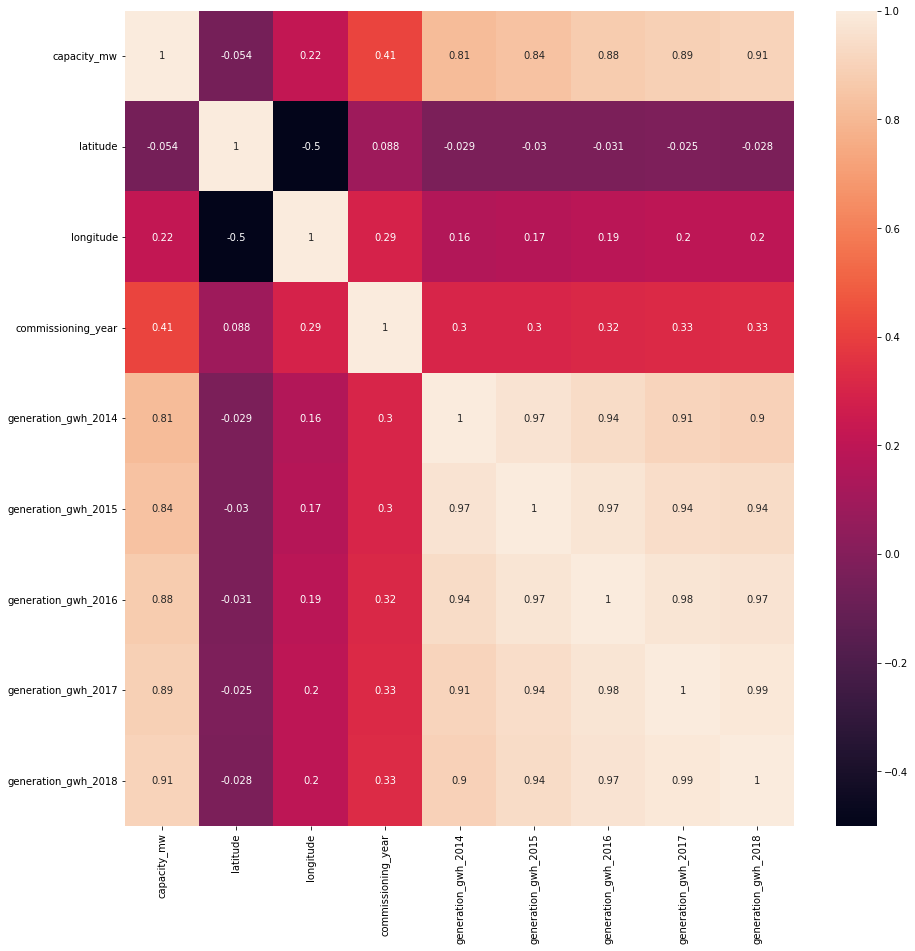

In [38]:
plt.figure(figsize=(15,15))
sns.heatmap(dfs.corr(),annot=True)

We can see that generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018 are positive correlated.

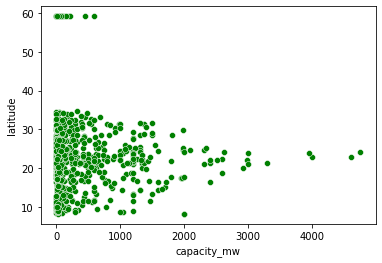

In [39]:
sns.scatterplot(x=dfs['capacity_mw'],y=dfs['latitude'],color='green')

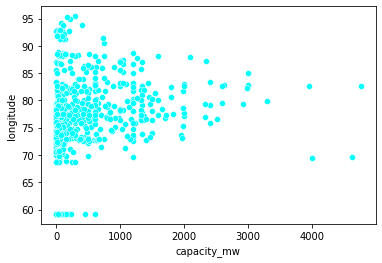

In [40]:
sns.scatterplot(x=dfs['capacity_mw'],y=dfs['longitude'],color='aqua')

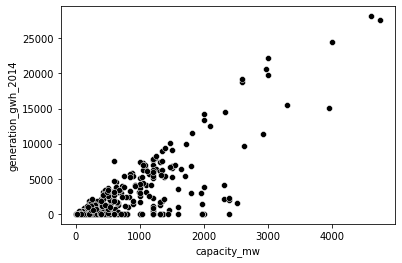

In [41]:
sns.scatterplot(x=dfs['capacity_mw'],y=dfs['generation_gwh_2014'],color='black')

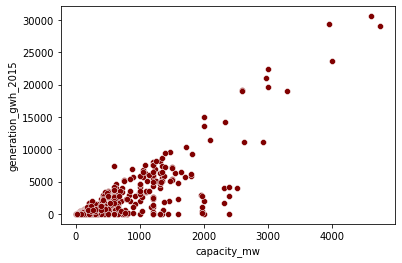

In [42]:
sns.scatterplot(x=dfs['capacity_mw'],y=dfs['generation_gwh_2015'],color='maroon')

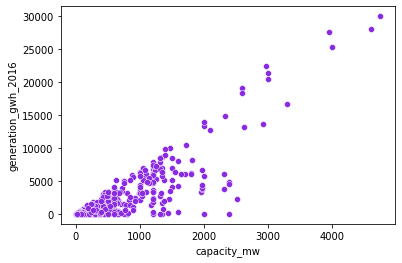

In [43]:
sns.scatterplot(x=dfs['capacity_mw'],y=dfs['generation_gwh_2016'],color='blueviolet')

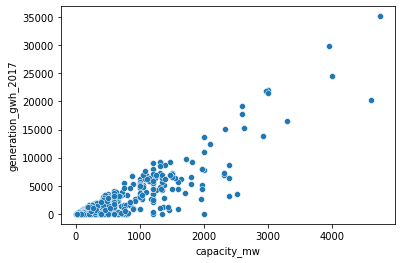

In [44]:
sns.scatterplot(x=dfs['capacity_mw'],y=dfs['generation_gwh_2017'])

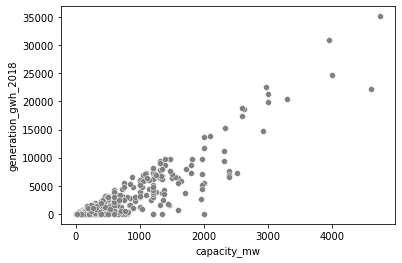

In [45]:
sns.scatterplot(x=dfs['capacity_mw'],y=dfs['generation_gwh_2018'],color='gray')

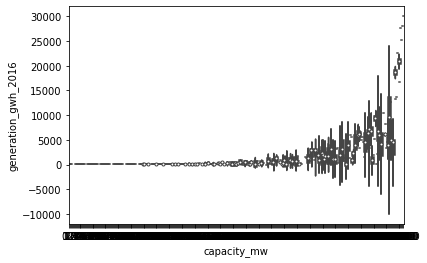

In [46]:
sns.violinplot(x='capacity_mw',y='generation_gwh_2016',data=dfs)

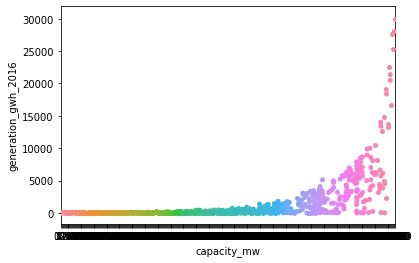

In [47]:
sns.swarmplot(x='capacity_mw',y='generation_gwh_2016',data=dfs)

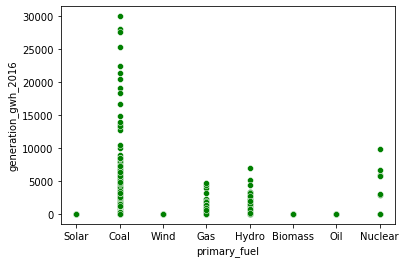

In [48]:
sns.scatterplot(x=dfs['primary_fuel'],y=dfs['generation_gwh_2016'],color='green')

In 2016 the coal is high

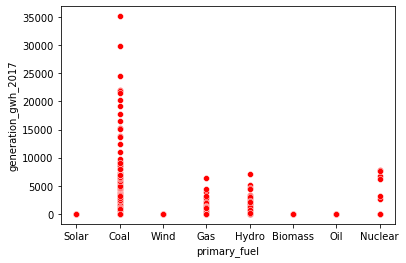

In [49]:
sns.scatterplot(x=dfs['primary_fuel'],y=dfs['generation_gwh_2017'],color='red')

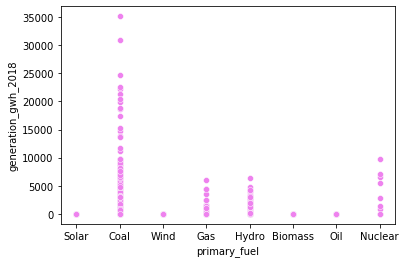

In [50]:
sns.scatterplot(x=dfs['primary_fuel'],y=dfs['generation_gwh_2018'],color='violet')

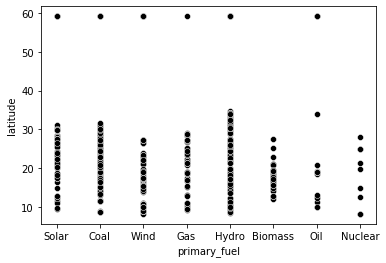

In [51]:
sns.scatterplot(x=dfs['primary_fuel'],y=dfs['latitude'],color='black')

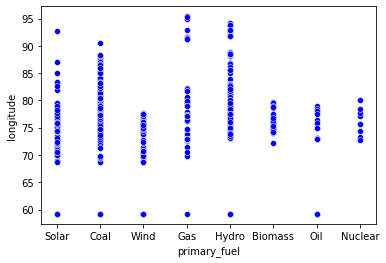

In [52]:
sns.scatterplot(x=dfs['primary_fuel'],y=dfs['longitude'],color='blue')

In [53]:
dfs['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

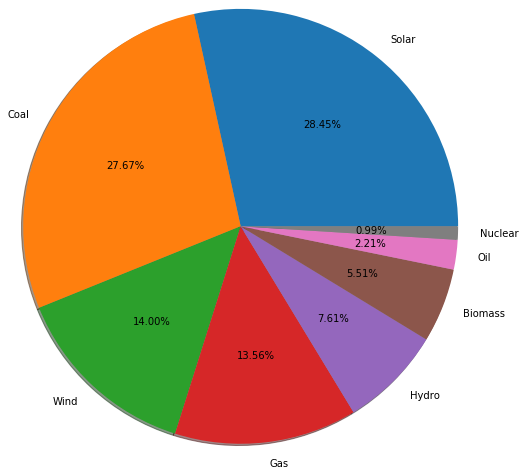

In [54]:

label=['Solar','Coal','Wind','Gas','Hydro','Biomass','Oil','Nuclear']
figure,axes=plt.subplots()
axes.pie(dfs['primary_fuel'].value_counts(),labels=label,autopct='%1.2f%%',shadow=True,radius=2.5)
plt.show()

Solar primary fuel is the leading one

In [55]:
dfs['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


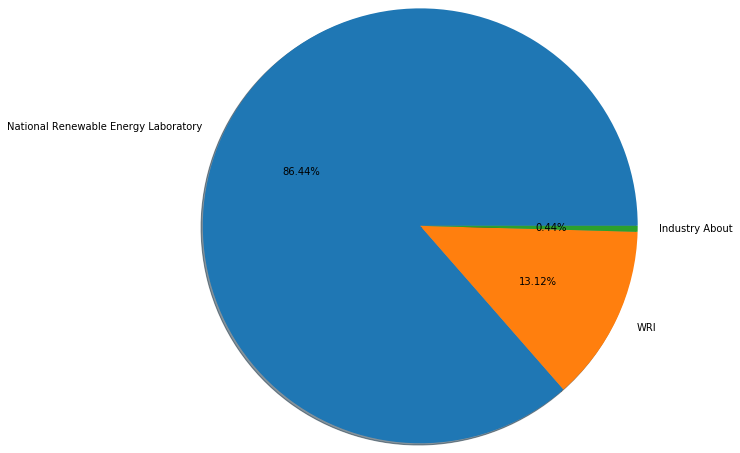

In [56]:
print(dfs['geolocation_source'].value_counts())
label=['National Renewable Energy Laboratory', 'WRI', 'Industry About']
figure,axes=plt.subplots()
axes.pie(dfs['geolocation_source'].value_counts(),labels=label,autopct='%1.2f%%',shadow=True,radius=2.5)
plt.show()

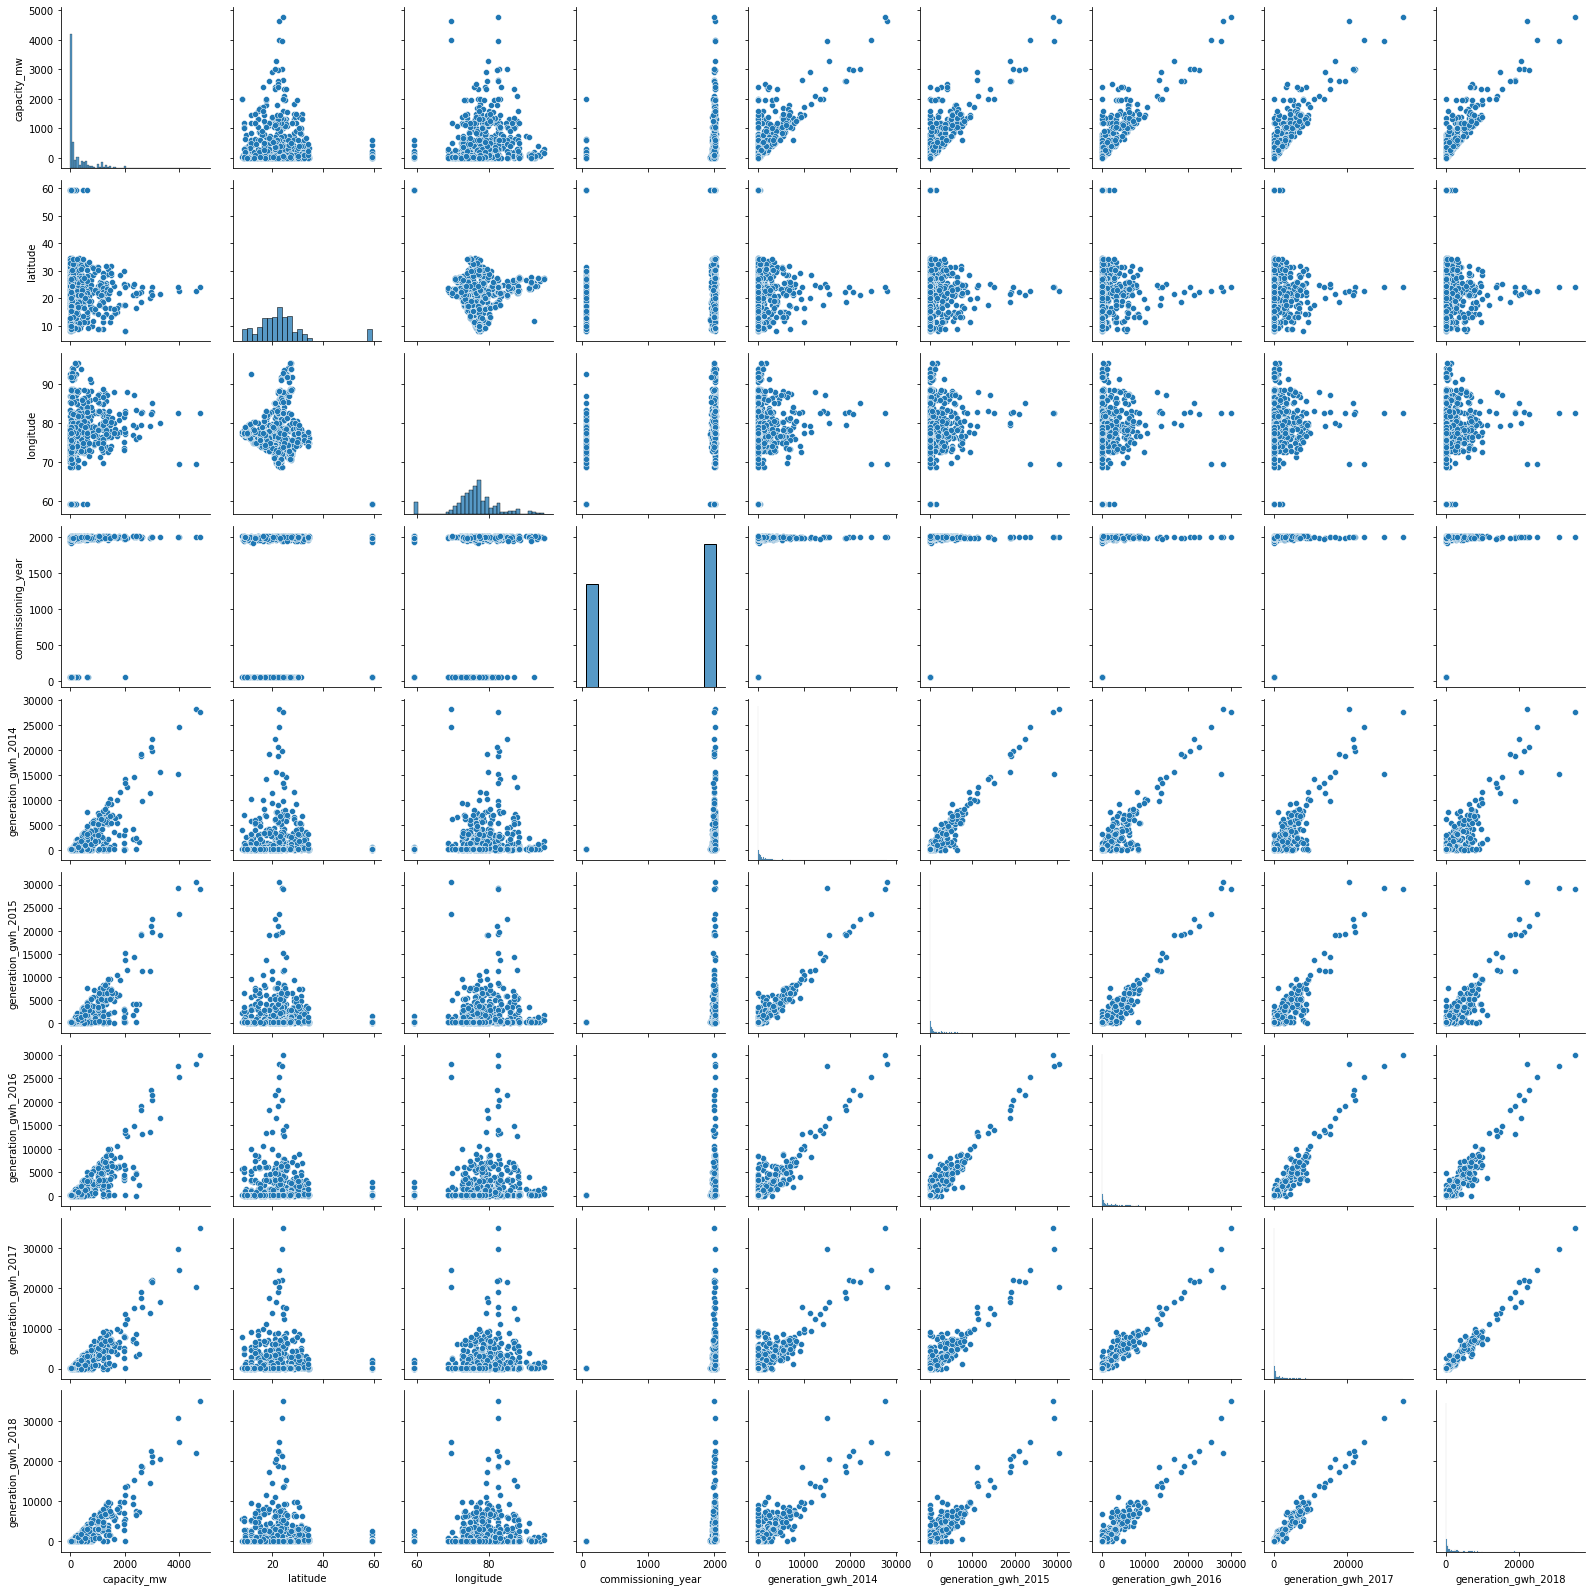

In [57]:
sns.pairplot(dfs)

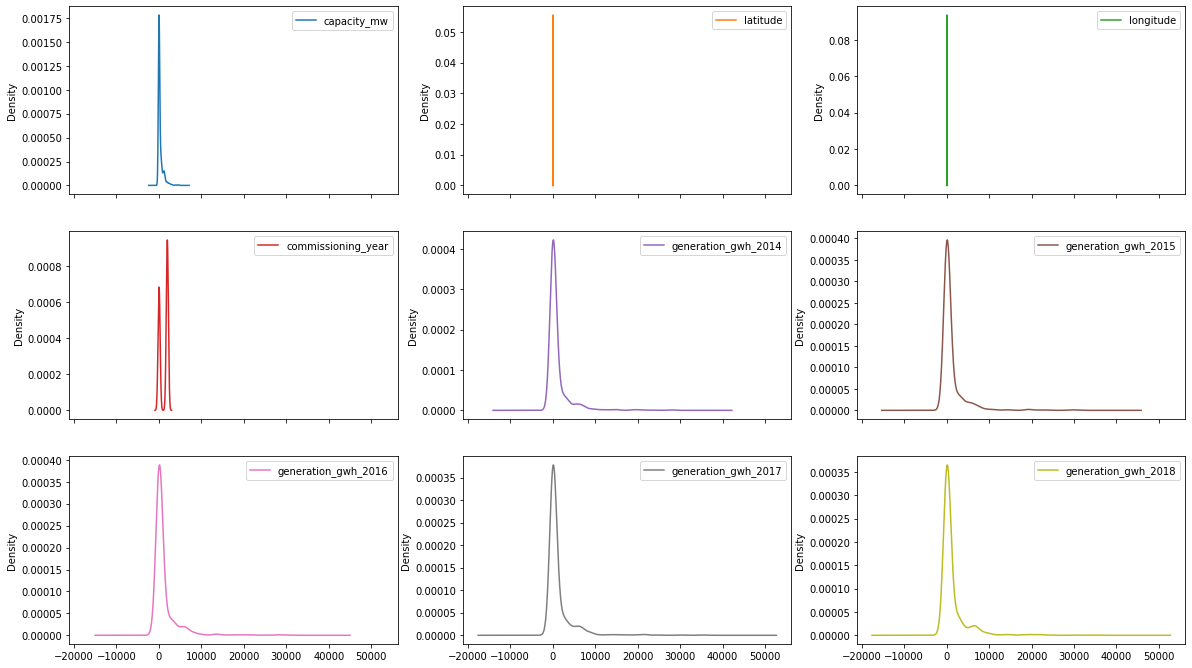

In [58]:
dfs.plot(kind='kde',subplots='True',layout=(5,3),figsize=(20,20))
plt.show()

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

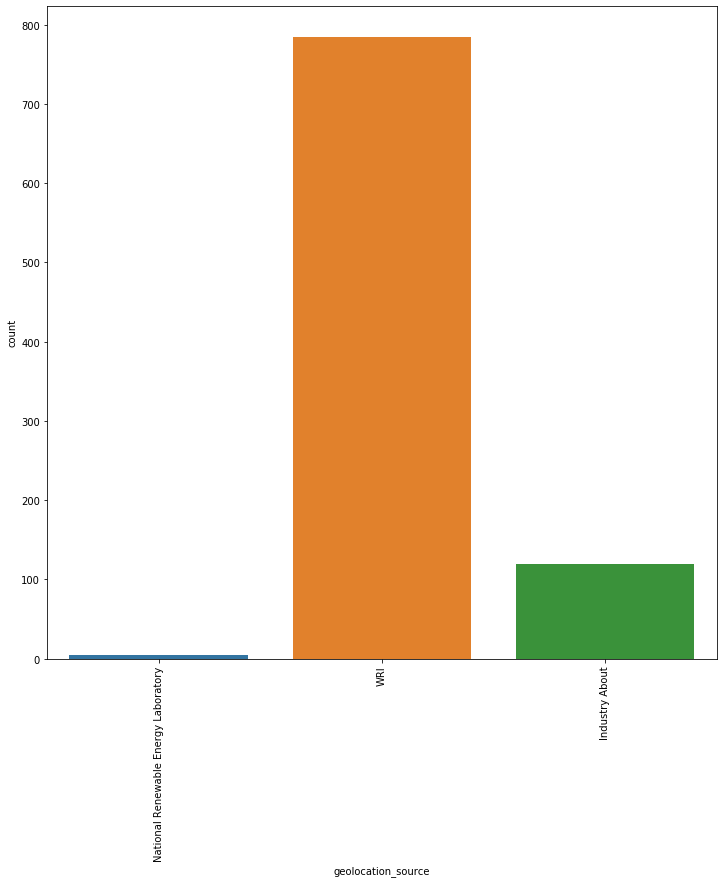

In [59]:
plt.figure(figsize=(12,12))
sns.countplot(dfs['geolocation_source'])
plt.xticks(rotation=90)

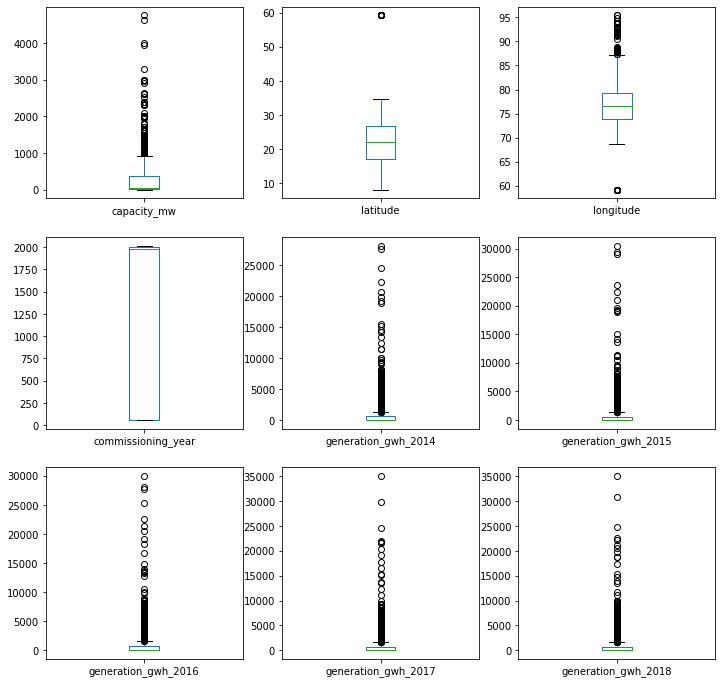

In [60]:
dfs.plot(kind='box',subplots=True,layout=(3,3),figsize=(12,12))
plt.show()

Outliers are present in Data

# Label Encoder

Let's convert the categorical data to numerical data

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
le=LabelEncoder()

In [63]:
dfs.dtypes

name                    object
capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
commissioning_year     float64
source                  object
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [64]:
dfs['primary_fuel']=le.fit_transform(dfs['primary_fuel'])
dfs['geolocation_source']=le.fit_transform(dfs['geolocation_source'])
dfs['source']=le.fit_transform(dfs['source'])

In [65]:
# Lets remove the name column

dfs=dfs.drop('name',axis=1)

In [66]:
dfs.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel             int32
commissioning_year     float64
source                   int32
geolocation_source       int32
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

We have converted all the object type to integer datatype. As there is no string present in the data. We are good to proceed further

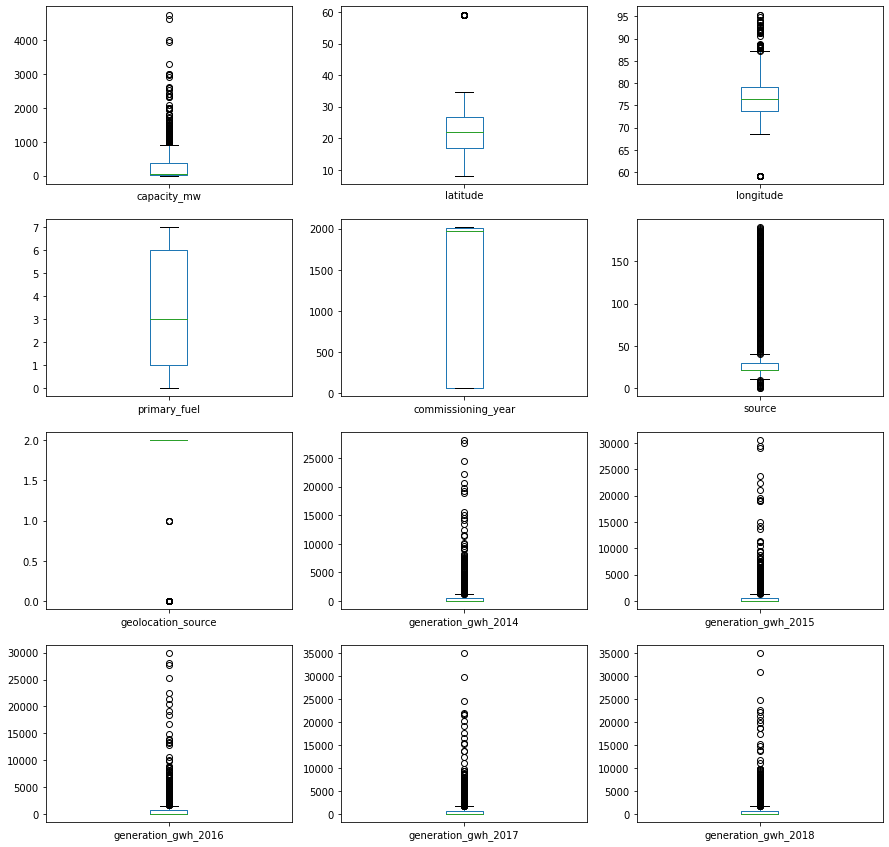

In [67]:
dfs.plot(kind='box',subplots=True,layout=(4,3),figsize=(15,15))
plt.show()

# Removal of Outliers

In [68]:
from scipy.stats import zscore

In [69]:
outliers=dfs[['capacity_mw','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]

In [70]:
z=np.abs(zscore(outliers))
z

array([[0.54890755, 0.35747349, 0.35643005, ..., 0.36967293, 0.38038384,
        0.3821734 ],
       [0.38697729, 0.35747349, 0.35643005, ..., 0.36967293, 0.38038384,
        0.3821734 ],
       [0.48667885, 0.35747349, 0.35643005, ..., 0.36967293, 0.38038384,
        0.3821734 ],
       ...,
       [0.50990864, 0.35747349, 0.35643005, ..., 0.36967293, 0.38038384,
        0.3821734 ],
       [0.41749818, 0.35747349, 0.35643005, ..., 0.36967293, 0.38038384,
        0.3821734 ],
       [0.52516908, 0.35747349, 0.35643005, ..., 0.36967293, 0.38038384,
        0.3821734 ]])

In [71]:
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 143, 143,
       147, 158, 209, 209, 209, 209, 209, 209, 209, 308, 308, 308, 308,
       308, 308, 308, 363, 364, 364, 364, 364, 364, 364, 364, 375, 482,
       482, 493, 493, 493, 493, 493, 493, 493, 494, 494, 494, 494, 494,
       494, 494, 532, 623, 648, 648, 648, 648, 648, 648, 648, 657, 657,
       657, 657, 657, 657, 657, 695, 695, 695, 695, 695, 695, 695, 721,
       721, 721, 721, 721, 721, 724, 724, 724, 724, 724, 724, 726, 726,
       726, 726, 726, 726, 726, 767, 786, 786, 786, 786, 786, 786, 786,
       788, 808, 808, 808, 808, 808, 808, 808, 880, 880, 880, 880, 880,
       880, 880], dtype=int64), array([0, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 0, 1, 2, 3, 4, 5, 6, 0, 0, 6, 0, 1, 2, 3,
       4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 1, 1, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5,
       6, 0, 1, 2, 3, 4, 5,

In [72]:
print(np.where(z<3))

(array([  0,   0,   0, ..., 906, 906, 906], dtype=int64), array([0, 1, 2, ..., 4, 5, 6], dtype=int64))


In [73]:
threshold=3
dfs_new=dfs[(z<3).all(axis=1)]
dfs_new

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.0,109,1,59.200000,59.200000,59.200000,59.200000,59.200000
1,98.0,24.7663,74.6090,1,59.2,174,2,59.200000,59.200000,59.200000,59.200000,59.200000
2,39.2,21.9038,69.3732,7,59.2,21,2,59.200000,59.200000,59.200000,59.200000,59.200000
3,135.0,23.8712,91.3602,2,2004.0,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.0,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.0,22,2,59.200000,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,59.2,77,0,59.200000,59.200000,59.200000,59.200000,59.200000
904,25.5,15.2758,75.5811,7,59.2,21,2,59.200000,59.200000,59.200000,59.200000,59.200000
905,80.0,24.3500,73.7477,1,59.2,59,2,59.200000,59.200000,59.200000,59.200000,59.200000


In [74]:
#Data with Outliers
dfs.shape

(907, 12)

In [75]:
#After Outliers Removal
dfs_new.shape

(882, 12)

In [76]:
data_loss=((907-882)/907)*100
data_loss

2.7563395810363835

2.7% of data removed in the Outliers

# Skewness

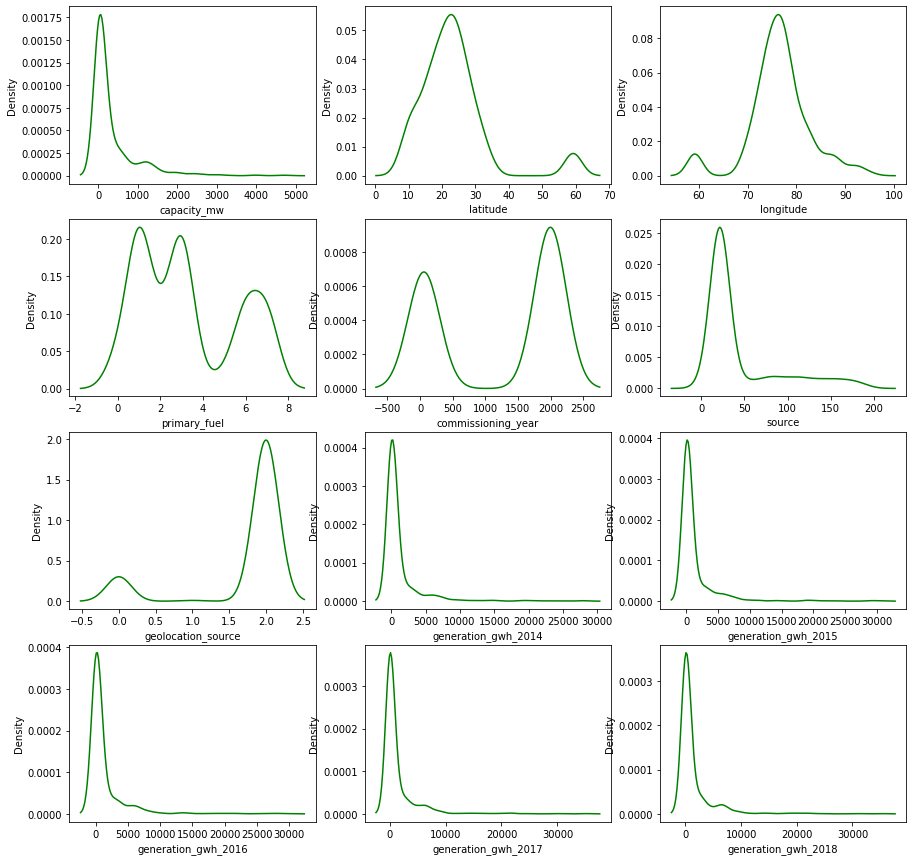

In [77]:
plt.figure(figsize=(15,15))
for i in enumerate(dfs):
    plt.subplot(4,3,i[0]+1)
    sns.distplot(dfs[i[1]],color='green',hist=False)

In [78]:
dfs_new.skew()

capacity_mw            2.054665
latitude               1.914796
longitude             -0.275375
primary_fuel           0.428186
commissioning_year    -0.279248
source                 1.782583
geolocation_source    -2.112610
generation_gwh_2014    2.885639
generation_gwh_2015    2.711018
generation_gwh_2016    2.651120
generation_gwh_2017    2.563221
generation_gwh_2018    2.615528
dtype: float64

Skewness that is present below 0.5 and above 0.5 is treated as skewness

# Removal of Skewness

In [79]:
skewed=['capacity_mw','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']

In [80]:
from sklearn.preprocessing import PowerTransformer

In [81]:
scaled=PowerTransformer(method='yeo-johnson')

In [82]:
dfs_new[skewed]=scaled.fit_transform(dfs_new[skewed].values)

In [83]:
dfs_new

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.689454,28.1839,73.2407,6,2011.0,109,1,-0.453628,-0.457636,-0.473538,-0.475365,-0.477397
1,0.246915,24.7663,74.6090,1,59.2,174,2,-0.453628,-0.457636,-0.473538,-0.475365,-0.477397
2,-0.256673,21.9038,69.3732,7,59.2,21,2,-0.453628,-0.457636,-0.473538,-0.475365,-0.477397
3,0.421196,23.8712,91.3602,2,2004.0,22,2,0.817625,0.955213,0.945220,0.766562,0.711531
4,1.780399,21.9603,82.4091,1,2015.0,22,2,1.639357,1.928964,1.916518,1.808049,1.946099
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1.720681,16.2949,77.3568,1,2016.0,22,2,-0.453628,-2.448396,0.255690,0.900474,0.757894
903,-1.608399,12.8932,78.1654,6,59.2,77,0,-0.453628,-0.457636,-0.473538,-0.475365,-0.477397
904,-0.494061,15.2758,75.5811,7,59.2,21,2,-0.453628,-0.457636,-0.473538,-0.475365,-0.477397
905,0.135936,24.3500,73.7477,1,59.2,59,2,-0.453628,-0.457636,-0.473538,-0.475365,-0.477397


In [84]:
dfs_new.skew()

capacity_mw            0.016603
latitude               1.914796
longitude             -0.275375
primary_fuel           0.428186
commissioning_year    -0.279248
source                 1.782583
geolocation_source    -2.112610
generation_gwh_2014   -0.016889
generation_gwh_2015   -0.015204
generation_gwh_2016   -0.011726
generation_gwh_2017   -0.006580
generation_gwh_2018   -0.001061
dtype: float64

Removed the skewness

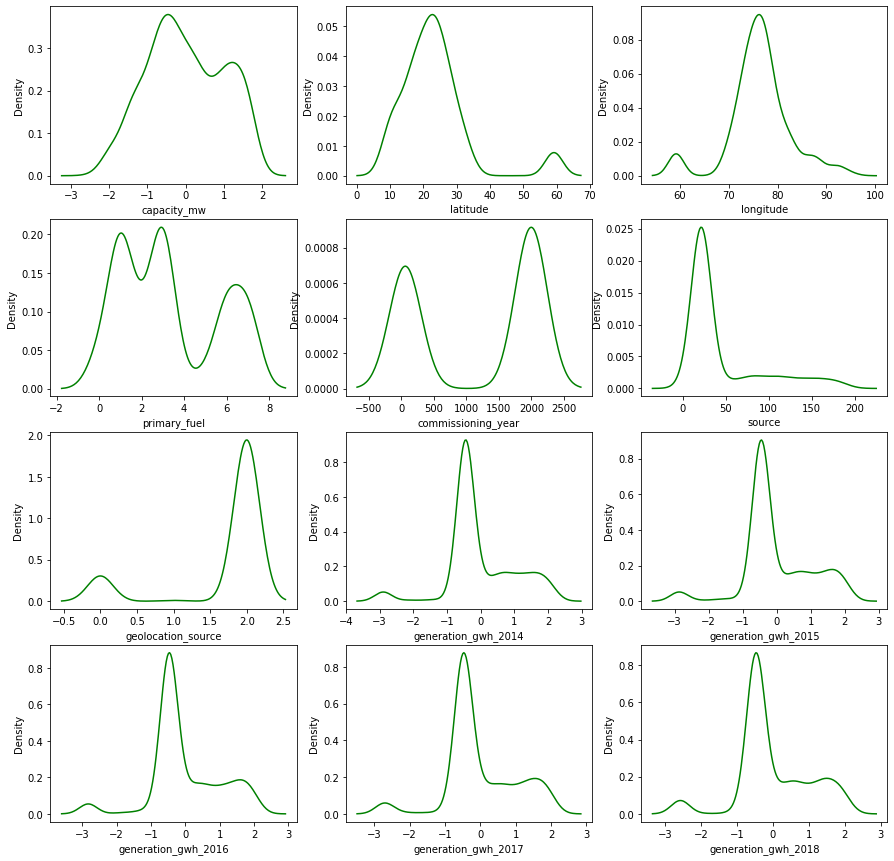

In [85]:
# Viewing the Distribution plot after removing the skewness
plt.figure(figsize=(15,15))
for i in enumerate(dfs_new):
    plt.subplot(4,3,i[0]+1)
    sns.distplot(dfs_new[i[1]],color='green',hist=False)

### Let's split the data into x and y variable for training and testing by taking the capcity_mw as target variable

In [86]:
x=dfs_new.drop('capacity_mw',axis=1)

In [87]:
y=dfs_new['capacity_mw']

In [88]:
x.shape

(882, 11)

In [89]:
y.shape

(882,)

# Standard Scaler

In [90]:
sc=StandardScaler()

In [91]:
x_scaled=sc.fit_transform(x)
x_scaled

array([[ 0.48064046, -0.50902126,  1.19763137, ..., -0.4735376 ,
        -0.47536543, -0.4773968 ],
       [ 0.15339535, -0.29093156, -0.99479467, ..., -0.4735376 ,
        -0.47536543, -0.4773968 ],
       [-0.12069732, -1.12545181,  1.63611658, ..., -0.4735376 ,
        -0.47536543, -0.4773968 ],
       ...,
       [-0.75534754, -0.13599112,  1.63611658, ..., -0.4735376 ,
        -0.47536543, -0.4773968 ],
       [ 0.11353342, -0.42821188, -0.99479467, ..., -0.4735376 ,
        -0.47536543, -0.4773968 ],
       [-1.26680208,  0.16615946,  1.63611658, ..., -0.4735376 ,
        -0.47536543, -0.4773968 ]])

# Variance Inflation Factor

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [93]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif

,Features,VIF
0,latitude,1.506238
1,longitude,1.732558
2,primary_fuel,2.055729
3,commissioning_year,2.232191
4,source,2.066637
5,geolocation_source,1.930889
6,generation_gwh_2014,3.304862
7,generation_gwh_2015,5.438386
8,generation_gwh_2016,9.342766
9,generation_gwh_2017,8.578107


There is no high variance inflation found in the data

In [94]:
from sklearn.metrics import r2_score

# Checking the Best Random State

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
# Let's check the best random state for training and testing
lr=LinearRegression()

for i in range(1,100):
    train_x,test_x,train_y,test_y=train_test_split(x_scaled,y,test_size=.20,random_state=i)
    lr.fit(train_x,train_y)
    lr_pred_train=lr.predict(train_x)
    lr_pred_test=lr.predict(test_x)
    print(f'At random State {i}, the training accuracy is: {r2_score(train_y,lr_pred_train)}')
    print(f'At random State {i}, the testing accuracy is: {r2_score(test_y,lr_pred_test)}')
    print('\n')

At random State 1, the training accuracy is: 0.6122343097153183
At random State 1, the testing accuracy is: 0.5606843870026473


At random State 2, the training accuracy is: 0.6087079017430612
At random State 2, the testing accuracy is: 0.5558350038776558


At random State 3, the training accuracy is: 0.6082905683500586
At random State 3, the testing accuracy is: 0.5800635136913506


At random State 4, the training accuracy is: 0.5981226464567552
At random State 4, the testing accuracy is: 0.623970963442001


At random State 5, the training accuracy is: 0.6032117443004603
At random State 5, the testing accuracy is: 0.6018771093271873


At random State 6, the training accuracy is: 0.5926952261803156
At random State 6, the testing accuracy is: 0.635722999511164


At random State 7, the training accuracy is: 0.6141237925519507
At random State 7, the testing accuracy is: 0.5483822207106848


At random State 8, the training accuracy is: 0.5895610693758807
At random State 8, the testing accu

We got the best random state=96

In [132]:
train_x,test_x,train_y,test_y=train_test_split(x_scaled,y,test_size=.25,random_state=96)

In [133]:
train_x.shape

(661, 11)

In [134]:
train_y.shape

(661,)

In [135]:
test_x.shape

(221, 11)

In [136]:
test_y.shape

(221,)

# Model Building

### Linear Regression

In [137]:
lr=LinearRegression()
lr.fit(train_x,train_y)

LinearRegression()

In [138]:
lr_pred=lr.predict(test_x)
print("Predicted value:\n\n",lr_pred)

Predicted value:

 [-1.15628592  1.31994271 -0.63258719  0.05136421 -0.69537866  0.55609613
 -0.27493671  0.30075103 -0.93023984 -0.60063417 -1.17895494 -1.29971396
 -0.53305889 -0.12702892  0.32385443 -0.32051959  0.95465233 -0.25961623
  0.69708438 -0.21429071 -1.28983749  0.16583515  1.31739645 -1.17231163
 -1.27990604  0.04538096 -0.40920897  1.22371727 -1.13845985  0.58441162
 -1.12653982 -0.22686217  1.35807625  0.35517759  0.89426029  0.11633705
  1.14567165  1.30109813  0.80281034  1.32754115 -0.93023984  0.62450237
 -0.6455557  -0.336632   -1.24811639  0.14093521 -0.20564781  0.52112002
 -0.70461104  0.99385161  0.59787114  1.18572737 -0.62534219  1.0909285
  1.08747953  0.51341086 -0.71103806  0.03368917 -0.16444673  1.27338085
 -1.20438585 -0.12702892  0.37804233 -0.21148734 -0.27605187  0.99124965
  0.98373372  0.7283039  -0.28676467 -0.24907733 -0.59001792 -1.19311216
 -0.28542944 -0.26047372  0.68065062 -0.62055805  0.83472613  0.16934211
  0.4138822   0.56456939 -0.10739

In [139]:
# checking the score for training data
lr.score(train_x,train_y)

0.5947605982115918

In [140]:
# checking the score for testing data
lr.score(test_x,test_y)

0.6289668147279894

In [141]:
#checking the coefficiet
lr.coef_

array([-0.06012046,  0.01736147, -0.17498986,  0.24705223, -0.06059943,
        0.16237833,  0.00599377,  0.16330319,  0.10196774,  0.09728764,
        0.05706615])

In [142]:
#checking the intercept
lr.intercept_

-0.0022398885938006256

In [143]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [144]:
print("The R2 Score value is:",r2_score(test_y,lr_pred))
print("The Mean Squared Error(MSE) value is:",mean_squared_error(test_y,lr_pred))
print("The Mean Absolute Error(MAE) value is:",mean_absolute_error(test_y,lr_pred))

The R2 Score value is: 0.6289668147279894
The Mean Squared Error(MSE) value is: 0.3526042929575306
The Mean Absolute Error(MAE) value is: 0.48512620975488796


# Decision Tree Regressor

In [145]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor()
dtr.fit(train_x,train_y)

DecisionTreeRegressor()

In [146]:
dtr_pred=dtr.predict(test_x)
print("Predicted value:\n\n",dtr_pred)

Predicted value:

 [-0.78539412  1.73630213  0.10056229 -1.06068176 -0.11149992  0.00482315
 -0.56304264 -0.02200951 -0.77418603 -0.057528   -1.36421392 -1.36421392
 -0.30369471 -1.41637075 -0.40437455 -0.87162418  1.36514679 -0.86489077
  0.38375385 -0.12241452 -0.7169995  -0.62784296  1.62270997 -1.00455015
 -0.78539412 -0.62784296 -0.24551988  1.82241839 -0.62784296  0.20039545
 -2.03261958 -0.5049817   1.68787286 -0.02200951  1.48036711  0.13593645
  1.41444888  1.48036711  1.42605441  1.50546337 -0.77418603  1.12009941
 -0.54854724 -0.75016092 -0.5049817  -1.27213821  0.25245626  0.20039545
 -0.62784296  1.21553546  1.37514733  1.82241839 -0.73333636  1.36514679
  1.02838936  1.62270997  0.74435669 -1.06068176 -0.18051713  1.59075356
 -0.12241452 -1.41637075  0.10056229 -0.40437455 -1.00455015  1.25325906
  1.21553546  0.57669917 -0.78539412 -0.39074092 -0.73333636 -1.36421392
 -0.78539412 -0.48335097  0.45616913 -0.97842449  1.06473144  0.61978109
  1.72068082  0.75297855  0.1005

In [147]:
dtr.score(train_x,train_y)

0.9941858195312365

In [148]:
dtr.score(test_x,test_y)

0.7084417488577079

In [149]:
print("The R2 Score value is:",r2_score(test_y,dtr_pred))
print("The Mean Squared Error(MSE) value is:",mean_squared_error(test_y,dtr_pred))
print("The Mean Absolute Error(MAE) value is:",mean_absolute_error(test_y,dtr_pred))

The R2 Score value is: 0.7084417488577079
The Mean Squared Error(MSE) value is: 0.27707680897759634
The Mean Absolute Error(MAE) value is: 0.37797770886610194


# Random Forest Regressor

In [150]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(train_x,train_y)

RandomForestRegressor()

In [151]:
rfr_pred=rfr.predict(test_x)
print("Predicted value:\n\n",rfr_pred)

Predicted value:

 [-0.98172807  1.57454651 -0.34604105 -1.00043354 -0.24659672  0.37327535
 -0.19632023 -0.15733034 -0.78694359 -0.3589437  -0.80572759 -1.03815024
  0.10089235 -1.37185028 -0.326048   -0.50541234  1.39346683 -0.38847966
  0.60639417 -0.22329362 -0.90265887 -0.78394383  1.55467671 -1.10231587
 -0.8363229  -0.17310732 -0.36037914  1.28721457 -0.89419314  0.20838529
 -1.41352363  0.18789612  1.56944518  0.14630251  1.3069491  -0.12934208
  1.54551281  1.45894248  1.16261611  1.53675563 -0.78694359  1.24060836
 -0.15796283 -0.78230028 -1.16243593 -0.74893687 -0.1666203   0.20908974
 -0.69465875  0.99062672  0.89926741  1.30252975 -0.67675041  1.35692525
  1.12897287  0.79421264  0.71451851 -0.9386533   0.04911074  1.58773264
 -1.23916485 -1.37185028  0.04742301 -0.3781448  -0.74139051  0.95685507
  1.15297187  0.7720543  -0.18534027 -0.31524914 -0.59911225 -1.24929912
 -0.18586656 -0.52699532  0.79880133 -0.77586011  1.10922104 -0.09586825
  1.37242529  0.54786123 -0.4774

In [152]:
print("The R2 Score value is:",r2_score(test_y,rfr_pred))
print("The Mean Squared Error(MSE) value is:",mean_squared_error(test_y,rfr_pred))
print("The Mean Absolute Error(MAE) value is:",mean_absolute_error(test_y,rfr_pred))

The R2 Score value is: 0.8108983052696748
The Mean Squared Error(MSE) value is: 0.17970917970201056
The Mean Absolute Error(MAE) value is: 0.30499493868583444


# Support Vector Regressor

# SVR (kernel=linear)

In [169]:
from sklearn.svm import SVR

svr_linear=SVR(kernel='linear')
svr_linear.fit(train_x,train_y)

SVR(kernel='linear')

In [170]:
svr_linear_pred=svr_linear.predict(test_x)
print("Predicted value:\n\n",svr_linear_pred)

Predicted value:

 [-1.29688447  1.49549882 -0.54731598 -0.15981431 -0.56210709  0.54148807
 -0.31013268  0.09898012 -0.64538756 -0.54060138 -1.27119056 -1.31106606
 -1.20726761 -0.19883585  0.05448233 -0.45215134  1.20000327 -0.43733726
  0.67418452 -0.41532563 -1.30760063 -0.15152479  1.51782985 -1.27706926
 -1.30525547 -0.45727971 -0.47220566  1.29426164 -1.25468306  0.34051082
 -1.25860301 -0.42772287  1.5123186   0.29393224  1.15922537 -0.11231043
  1.57213319  1.43013518  1.02677995  1.46751484 -0.64538756  0.71627919
 -0.55257051 -0.44886405 -1.30220447 -0.15455799 -0.41672454  0.26560793
 -0.57695694  1.02490856  0.63918746  1.27169163 -0.54971384  1.20611723
  1.0922342   0.42674159 -1.61410013 -0.14640113 -0.40544068  1.47081113
 -1.29993333 -0.19883585  0.25299666 -0.42026583 -0.42999724  0.97815377
  0.98762253  0.74446606 -0.44609736 -0.44226063 -0.53621844 -1.28192243
 -0.44565572 -0.4276259   0.74711293 -0.54793152  1.03283403 -0.14175754
  0.69831854  0.57644402 -0.3755

In [171]:
print("The R2 Score value is:",r2_score(test_y,svr_linear_pred))
print("The Mean Squared Error(MSE) value is:",mean_squared_error(test_y,svr_linear_pred))
print("The Mean Absolute Error(MAE) value is:",mean_absolute_error(test_y,svr_linear_pred))

The R2 Score value is: 0.5881840283310853
The Mean Squared Error(MSE) value is: 0.3913614341867605
The Mean Absolute Error(MAE) value is: 0.45359743932498775


## SVR(kernel=poly)

In [172]:
svr_poly=SVR(kernel='poly')
svr_poly.fit(train_x,train_y)

SVR(kernel='poly')

In [173]:
svr_poly_pred=svr_poly.predict(test_x)
print("Predicted value:\n\n",svr_poly_pred)

Predicted value:

 [-1.56498066  1.65048256 -0.39109794 -0.29729355 -0.45411617  0.35912366
  0.05720083 -0.09815202 -1.14702798 -0.75069295 -1.22698148 -0.83079295
 -0.20042516 -1.12283916 -0.21496654 -0.39946849  1.25738856 -0.47087644
  0.48865638 -0.30265376 -0.89102341 -0.27627321  1.56923627 -1.33112898
 -0.96770382 -0.25628094 -0.52041482  1.35958002 -1.26680359  0.17478113
 -1.27381044 -0.23845197  1.63641217  0.04084246  1.19312812 -0.23118009
  1.80742476  1.57075447  1.25990349  1.6338601  -1.14702798  0.89949766
 -0.55565389 -0.69168596 -1.26712896 -0.22188374 -0.21593264  0.04654578
 -0.35219436  0.73473376  0.4258945   1.24254657 -0.61624238  1.22615223
  1.01515473  0.41689786  0.56325587 -0.34508596 -0.26465959  1.59164415
 -1.44508613 -1.12283916 -0.00923658 -0.39691249 -0.66953554  0.78989419
  1.01114017  0.52546897 -0.32093456 -0.20932714 -0.82002533 -1.31541844
 -0.31905747 -0.61495034  0.53158383 -0.6405798   1.0659468  -0.21067969
  1.12197954  0.42120848 -0.3567

In [174]:
print("The R2 Score value is:",r2_score(test_y,svr_poly_pred))
print("The Mean Squared Error(MSE) value is:",mean_squared_error(test_y,svr_poly_pred))
print("The Mean Absolute Error(MAE) value is:",mean_absolute_error(test_y,svr_poly_pred))

The R2 Score value is: 0.759206086015634
The Mean Squared Error(MSE) value is: 0.22883389184363276
The Mean Absolute Error(MAE) value is: 0.35618758259378064


### SVR(Kernel='rbf')

In [177]:
svr_rbf=SVR(kernel='rbf')
svr_rbf.fit(train_x,train_y)

SVR()

In [178]:
svr_rbf_pred=svr_rbf.predict(test_x)
print("Predicted value:\n\n",svr_rbf_pred)

Predicted value:

 [-1.50507795  1.60019516 -0.14280281 -0.88190233 -0.40460147  0.52748153
 -0.2118603  -0.17832357 -0.70116581 -0.70433295 -1.16814064 -0.84256969
  0.33370146 -1.09138697 -0.42693444 -0.33462387  1.3570102  -0.44919826
  0.48284897 -0.39317898 -0.88756619 -0.356664    1.59243323 -1.31524624
 -0.95792655 -0.59227202 -0.53998168  1.1733487  -1.13644233  0.21551904
 -1.26407268 -0.28150168  1.49810047  0.03299474  1.35227631 -0.45111808
  1.59546585  1.42600859  1.05770951  1.43228069 -0.70116581  1.14133436
 -0.54467219 -0.68022628 -1.26278206 -0.69850912 -0.20381759  0.11851757
 -0.43297879  0.79111006  0.78271679  1.25100562 -0.61810725  1.27812932
  1.07501532  0.67121527  0.57244331 -0.76347748 -0.27222516  1.54051439
 -1.45183879 -1.09138697 -0.01965715 -0.3806917  -0.62964072  0.79005624
  1.13941811  0.83717598 -0.31492119 -0.18188174 -0.73903755 -1.28463776
 -0.31393771 -0.64498148  0.84867804 -0.63487844  1.17203167 -0.52604112
  1.33942459  0.52695206 -0.3446

In [179]:
print("The R2 Score value is:",r2_score(test_y,svr_rbf_pred))
print("The Mean Squared Error(MSE) value is:",mean_squared_error(test_y,svr_rbf_pred))
print("The Mean Absolute Error(MAE) value is:",mean_absolute_error(test_y,svr_rbf_pred))

The R2 Score value is: 0.8005429045193433
The Mean Squared Error(MSE) value is: 0.1895502367955577
The Mean Absolute Error(MAE) value is: 0.317082239621093


In Support Vector Regressor Kernel='rbf' gives a good score 80%

In [163]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor()
gbr.fit(train_x,train_y)

GradientBoostingRegressor()

In [164]:
gbr_pred=gbr.predict(test_x)
print("Predicted value:\n\n",gbr_pred)

Predicted value:

 [-1.06614013  1.57905275 -0.52601095 -1.03636122 -0.51548987  0.52696697
  0.08944588 -0.19929816 -0.82834282 -0.74400791 -0.85573881 -0.77191975
  0.33054002 -1.08185968 -0.29244716 -0.27721887  1.2915295  -0.53838026
  0.67540927 -0.28050188 -0.95262433 -0.86641042  1.60796613 -1.11970115
 -0.95262433 -0.03474913 -0.33694609  1.23516293 -0.99576579  0.29017687
 -1.13752588 -0.26495793  1.61040779  0.1116382   1.29918778 -0.17891294
  1.43516709  1.43286955  1.01183442  1.46136415 -0.82834282  1.2862449
 -0.54978002 -0.65157748 -1.36917119 -0.66266065 -0.24016234  0.24825796
 -0.68785788  1.2309116   0.74055095  1.29423309 -0.55177814  1.26213569
  1.13460421  0.58703469  0.85467094 -0.89503708 -0.00945882  1.58044004
 -1.26957982 -1.08185968  0.01793145 -0.5517744  -0.62173221  0.85667756
  1.21529055  0.77344699 -0.16295667 -0.29175513 -0.74838136 -1.1082939
 -0.16295667 -0.69412789  0.84325391 -0.55177814  1.14252017 -0.12692615
  1.1812657   0.59495731 -0.655125

In [165]:
print("The R2 Score value is:",r2_score(test_y,gbr_pred))
print("The Mean Squared Error(MSE) value is:",mean_squared_error(test_y,gbr_pred))
print("The Mean Absolute Error(MAE) value is:",mean_absolute_error(test_y,gbr_pred))

The R2 Score value is: 0.8111867098144694
The Mean Squared Error(MSE) value is: 0.17943509995755724
The Mean Absolute Error(MAE) value is: 0.3073283855758822


In [166]:
from sklearn.ensemble import AdaBoostRegressor

ada=AdaBoostRegressor()
ada.fit(train_x,train_y)

AdaBoostRegressor()

In [167]:
ada_pred=ada.predict(test_x)
print("Predicted value:\n\n",ada_pred)

Predicted value:

 [-0.89495065  1.44360396 -0.48409052 -0.65326473 -0.73237113  0.63204084
 -0.42150933 -0.39019847 -0.76059394 -0.89073122 -0.80555491 -0.74738538
 -0.40736532 -0.65326473 -0.27745766 -0.27745766  1.18614992 -0.26451158
  0.81702169 -0.21988556 -0.79954505 -0.52150529  1.4811679  -0.89073122
 -0.79954505 -0.39019847 -0.2248438   1.36127509 -0.76059394  0.39530783
 -0.81656736 -0.20460845  1.44360396  0.26917427  1.25254138 -0.4929027
  1.35306131  1.44360396  1.17008278  1.42826652 -0.76059394  1.13128439
 -0.74372798 -0.29078335 -0.89005113 -0.52086446 -0.2248438   0.38139704
 -0.88222745  1.13128439  0.89405917  1.43255603 -0.8239008   1.39223033
  1.13128439  0.80266356  0.39200412 -0.52086446 -0.08026751  1.43255603
 -0.94570141 -0.65326473 -0.19603415 -0.29078335 -0.36111957  1.05866657
  1.23439282  0.89405917 -0.19603415 -0.26451158 -0.48409052 -0.85256424
 -0.19603415 -0.40736532  0.83000081 -0.87051409  1.18614992 -0.40736532
  1.13128439  0.72256625 -0.27745

In [168]:
print("The R2 Score value is:",r2_score(test_y,ada_pred))
print("The Mean Squared Error(MSE) value is:",mean_squared_error(test_y,ada_pred))
print("The Mean Absolute Error(MAE) value is:",mean_absolute_error(test_y,ada_pred))

The R2 Score value is: 0.7710070858639115
The Mean Squared Error(MSE) value is: 0.21761903728919907
The Mean Absolute Error(MAE) value is: 0.35446026193761127


In [180]:
for rg in (lr,svr_linear,svr_poly,svr_rbf,dtr,rfr,gbr,ada):
    rg.fit(train_x,train_y)
    rg_pred=rg.predict(test_x)
    print(rg.__class__.__name__,r2_score(test_y,rg_pred))

LinearRegression 0.6289668147279894
SVR 0.5881840283310853
SVR 0.759206086015634
SVR 0.8005429045193433
DecisionTreeRegressor 0.7090207204587162
RandomForestRegressor 0.8107933661481576
GradientBoostingRegressor 0.8124328529860076
AdaBoostRegressor 0.7670324450090875


GradientBoostingRegreesor gives a good score 81%

# Cross Validation

In [185]:
from sklearn.model_selection import cross_val_score

def model_cv(model,x,y):
    cv=-(cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv=15))
    return(cv)

models=[LinearRegression(),
       DecisionTreeRegressor(),
       SVR(kernel='linear'),
       SVR(kernel='poly'),
       SVR(kernel='rbf'),
       RandomForestRegressor(),
       GradientBoostingRegressor(),
       AdaBoostRegressor()]

names=['Linear Regression', 'DecisionTreeRegressor','SVR_Linear','SVR_Poly','SVR_rbf','RandomForestRegressor','GradientBoostingRegressor','AdaBoostRegressor']

for model,name in zip(models,names):
    score=model_cv(model,x,y)
    print("{} : {:.6f} , {:4f}".format(name,score.mean(),score.std()))

Linear Regression : 0.412061 , 0.086346
DecisionTreeRegressor : 0.342893 , 0.118429
SVR_Linear : 0.518877 , 0.138119
SVR_Poly : 0.617249 , 0.113784
SVR_rbf : 0.622669 , 0.122756
RandomForestRegressor : 0.206937 , 0.081210
GradientBoostingRegressor : 0.198351 , 0.082353
AdaBoostRegressor : 0.257855 , 0.067813


After analysis and experimenting I choose Gradient Boosting Regressor as my final model, As it gives the good score

# Hyper parameter tuning

In [186]:
from sklearn.model_selection import GridSearchCV

In [218]:
parameters={"n_estimators":[40,42,44,46,50],
           "learning_rate":[0.20,0.22,0.24,0.25,0.35]}

In [219]:
grid=GridSearchCV(estimator=gbr,param_grid=parameters,cv=10,verbose=3)

In [220]:
grid.fit(train_x,train_y)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV 1/10] END learning_rate=0.2, n_estimators=40;, score=0.865 total time=   0.0s
[CV 2/10] END learning_rate=0.2, n_estimators=40;, score=0.844 total time=   0.0s
[CV 3/10] END learning_rate=0.2, n_estimators=40;, score=0.804 total time=   0.0s
[CV 4/10] END learning_rate=0.2, n_estimators=40;, score=0.823 total time=   0.0s
[CV 5/10] END learning_rate=0.2, n_estimators=40;, score=0.612 total time=   0.0s
[CV 6/10] END learning_rate=0.2, n_estimators=40;, score=0.789 total time=   0.0s
[CV 7/10] END learning_rate=0.2, n_estimators=40;, score=0.797 total time=   0.0s
[CV 8/10] END learning_rate=0.2, n_estimators=40;, score=0.737 total time=   0.0s
[CV 9/10] END learning_rate=0.2, n_estimators=40;, score=0.803 total time=   0.0s
[CV 10/10] END learning_rate=0.2, n_estimators=40;, score=0.797 total time=   0.0s
[CV 1/10] END learning_rate=0.2, n_estimators=42;, score=0.866 total time=   0.0s
[CV 2/10] END learning_rate=0.2, n

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.2, 0.22, 0.24, 0.25, 0.35],
                         'n_estimators': [40, 42, 44, 46, 50]},
             verbose=3)

In [221]:
grid.best_params_

{'learning_rate': 0.25, 'n_estimators': 40}

In [222]:
grid.best_estimator_

GradientBoostingRegressor(learning_rate=0.25, n_estimators=40)

##### Final Model

In [360]:
final_model=GradientBoostingRegressor(learning_rate=0.25,n_estimators=40)

In [361]:
final_model.fit(train_x,train_y)

GradientBoostingRegressor(learning_rate=0.25, n_estimators=40)

In [362]:
final_model_pred=final_model.predict(test_x)
print("Predicted Value:\n\n",final_model_pred)

Predicted Value:

 [6.0002083  2.87837717 2.44879719 6.93364954 2.42238704 1.28073229
 6.93905575 2.59376801 1.7633275  5.69661134 2.31850571 3.26188164
 2.12318764 1.69870177 0.98791839 5.96830667 2.25865738 3.02179841
 6.04006174 1.10196668 1.05128233 3.00438991 6.96659697 6.04006174
 6.96083905 0.94140884 3.23996173 6.8734092  2.75504853 2.78689187
 5.92192822 0.38887685 5.88868164 6.00858736 2.15602791 3.24346239
 1.90287731 1.81745542 3.26435295 6.8111251  1.3867457  0.91914513
 2.70936725 2.20417391 0.99562379 0.93591757 1.18651451 3.59686607
 0.94224437 2.77078104 2.96891704 2.34336169 5.94078658 3.05024582
 0.9029628  2.75871471 3.06918393 6.92979609 2.66391523 3.26435295
 3.00872492 1.13741077 1.91956973 1.49103596 2.96141677 7.02454914
 6.860648   5.85504553 2.82237626 5.83803618 2.44879719 5.94078658
 2.99286859 0.95237002 1.07056193 6.84216424 0.74175679 2.58029949
 1.84413789 5.77880906 1.55931413 2.49780269 2.40238703 6.96310462
 1.48702528 2.63159536 2.02463137 2.5181363

In [363]:
print("The R2 Score value is:",r2_score(test_y,final_model_pred))
print("The Mean Squared Error(MSE) value is:",mean_squared_error(test_y,final_model_pred))
print("The Mean Absolute Error(MAE) value is:",mean_absolute_error(test_y,final_model_pred))

The R2 Score value is: 0.9023936998658506
The Mean Squared Error(MSE) value is: 0.4883690726573112
The Mean Absolute Error(MAE) value is: 0.43981358268548193


In [364]:
final_model.score(train_x,train_y)

0.963184245569369

In [365]:
final_model.score(test_x,test_y)

0.9023936998658506

# Saving the Model

In [354]:
import pickle

In [355]:
filename="capacity_mw_prediction.pickle"

In [368]:
pickle.dump(final_model,open(filename,'wb'))

In [369]:
loaded_model=pickle.load(open(filename,'rb'))
loaded_model.predict(test_x)

array([6.0002083 , 2.87837717, 2.44879719, 6.93364954, 2.42238704,
       1.28073229, 6.93905575, 2.59376801, 1.7633275 , 5.69661134,
       2.31850571, 3.26188164, 2.12318764, 1.69870177, 0.98791839,
       5.96830667, 2.25865738, 3.02179841, 6.04006174, 1.10196668,
       1.05128233, 3.00438991, 6.96659697, 6.04006174, 6.96083905,
       0.94140884, 3.23996173, 6.8734092 , 2.75504853, 2.78689187,
       5.92192822, 0.38887685, 5.88868164, 6.00858736, 2.15602791,
       3.24346239, 1.90287731, 1.81745542, 3.26435295, 6.8111251 ,
       1.3867457 , 0.91914513, 2.70936725, 2.20417391, 0.99562379,
       0.93591757, 1.18651451, 3.59686607, 0.94224437, 2.77078104,
       2.96891704, 2.34336169, 5.94078658, 3.05024582, 0.9029628 ,
       2.75871471, 3.06918393, 6.92979609, 2.66391523, 3.26435295,
       3.00872492, 1.13741077, 1.91956973, 1.49103596, 2.96141677,
       7.02454914, 6.860648  , 5.85504553, 2.82237626, 5.83803618,
       2.44879719, 5.94078658, 2.99286859, 0.95237002, 1.07056

In [370]:
loaded_model.score(train_x,train_y)

0.963184245569369

In [371]:
loaded_model.score(test_x,test_y)

0.9023936998658506

### Let's split the data into x and y variable for training and testing by taking the primary_fuel as target variable

In [235]:
x=dfs_new.drop("primary_fuel",axis=1)

In [236]:
x.shape

(882, 11)

In [237]:
y=dfs_new['primary_fuel']

In [238]:
y.shape

(882,)

In [239]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.28,random_state=45)

In [240]:
train_x.shape

(635, 11)

In [241]:
test_x.shape

(247, 11)

In [242]:
train_y.shape

(635,)

In [243]:
test_y.shape

(247,)

# Model Building

### Logistic Regression

In [246]:
from sklearn.linear_model import LogisticRegression

In [247]:
lg=LogisticRegression()
lg.fit(train_x,train_y)

LogisticRegression()

In [248]:
lg_pred=lg.predict(test_x)
print("Predicted value:\n\n",lg_pred)

Predicted value:

 [6 3 3 7 3 3 7 3 3 7 3 3 3 3 3 6 3 3 6 3 3 3 7 6 7 3 3 7 1 3 7 6 1 6 3 3 3
 3 3 7 3 1 3 3 6 3 3 3 1 3 3 1 6 3 3 3 3 7 7 3 3 1 3 6 3 7 7 6 3 6 3 6 3 1
 1 7 3 3 3 6 3 3 6 7 3 3 3 3 7 7 7 3 3 7 7 3 3 3 7 3 6 3 6 3 3 1 3 7 6 6 7
 3 3 6 3 3 3 6 6 3 3 3 7 3 7 3 3 3 3 3 3 3 3 7 3 3 6 3 7 3 6 3 3 3 3 3 3 3
 3 1 3 3 7 3 3 7 3 3 3 3 6 3 6 1 1 3 6 7 3 3 3 3 7 7 3 3 7 3 6 3 7 6 1 3 7
 6 3 3 3 3 3 6 7 6 7 6 3 7 3 7 7 7 3 3 7 3 3 3 3 3 3 6 1 3 6 3 6 3 3 7 3 7
 3 3 3 7 6 3 7 1 3 3 1 3 6 7 6 6 3 6 3 1 3 7 3 3 6]


In [249]:
lg.coef_

array([[ 2.25499815e-04, -1.51475484e-02,  1.68796464e-02,
        -3.49477143e-02,  4.27232876e-02,  4.05628802e-03,
        -9.59210726e-05, -9.65411982e-05, -1.00113535e-04,
        -1.00701314e-04, -1.00773688e-04],
       [ 1.29405346e-02, -1.78962041e-02,  1.31342968e-02,
         5.87199278e-03,  2.65809989e-02,  4.25605071e-03,
         7.23843834e-03,  8.81167656e-03,  1.07633359e-02,
         1.04482356e-02,  9.86130335e-03],
       [ 1.79469418e-03, -2.24262822e-02, -6.78060563e-03,
         6.35661863e-03,  1.98249390e-02,  3.95870745e-05,
        -1.27815853e-03, -8.46170298e-04, -1.36582529e-03,
        -1.81027734e-03, -2.44477755e-03],
       [-9.90758229e-03,  4.75403344e-03, -3.47719830e-02,
         8.43686040e-03, -3.30104307e-02, -5.68431530e-04,
        -3.30239569e-03, -4.57001945e-03, -5.04482291e-03,
        -4.72634852e-03, -3.33411188e-03],
       [ 1.14461808e-03, -1.53388802e-02, -2.93234500e-02,
         6.53816462e-03, -1.92195908e-02, -5.07991008e-04,
  

In [250]:
lg.intercept_

array([ 1.72457012e-04, -2.43917226e-04, -1.85409136e-04, -4.23865160e-04,
       -3.84152066e-04, -2.72958279e-05, -1.32114226e-05,  1.10539383e-03])

In [251]:
lg.score(train_x,train_y)

0.5433070866141733

In [252]:
lg.score(test_x,test_y)

0.5101214574898786

In [256]:
print("Accuracy Score is:",accuracy_score(test_y,lg_pred),'\n')
print("Confusion Matrix is\n",confusion_matrix(test_y,lg_pred),'\n')
print("Classification_report is\n",classification_report(test_y,lg_pred))

Accuracy Score is: 0.5101214574898786 

Confusion Matrix is
 [[ 0  4  0  0  0  0  7  2]
 [ 0  3  0 56  0  0  6  5]
 [ 0  2  0 15  0  0  4  1]
 [ 0  5  0 68  0  0  0  0]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  0  1  0  0  2  0]
 [ 0  3  0  0  0  0 22  6]
 [ 0  0  0  0  0  0  0 33]] 

Classification_report is
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.18      0.04      0.07        70
           2       0.00      0.00      0.00        22
           3       0.48      0.93      0.63        73
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       0.54      0.71      0.61        31
           7       0.70      1.00      0.82        33

    accuracy                           0.51       247
   macro avg       0.24      0.34      0.27       247
weighted avg       0.35      0.51      0.39       247



# Decision Tree Classifier

In [266]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)

DecisionTreeClassifier()

In [267]:
dtc_pred=dtc.predict(test_x)
print("Predicted value:\n",dtc_pred)

Predicted value:
 [6 3 3 7 3 1 7 3 3 6 3 3 1 3 1 6 3 3 6 1 1 3 7 6 7 1 3 7 3 3 6 0 6 6 1 5 1
 1 3 7 1 0 3 1 1 1 1 3 0 2 3 3 6 3 1 3 3 7 5 3 3 1 1 1 3 7 7 6 3 6 3 6 3 1
 0 7 1 3 3 6 2 1 2 7 1 3 1 3 6 7 7 3 3 7 7 3 3 3 7 1 1 1 6 1 2 6 1 1 1 6 7
 1 3 1 1 3 3 6 2 3 3 1 3 3 1 1 2 3 1 3 3 3 3 7 3 1 2 2 6 3 1 3 1 1 1 1 3 3
 3 3 1 3 7 1 1 1 3 3 1 3 6 2 0 5 3 1 5 1 3 1 2 3 7 1 3 3 7 1 0 1 7 0 0 5 7
 6 1 1 3 1 3 6 7 2 7 6 1 7 2 6 7 1 3 1 6 1 1 2 2 3 1 0 2 1 6 1 6 3 1 7 3 7
 2 3 3 7 6 1 7 2 5 1 3 1 5 7 6 0 3 6 1 6 2 7 1 3 0]


In [268]:
print("Accuracy Score is:",accuracy_score(test_y,dtc_pred),'\n')
print("Confusion Matrix is\n",confusion_matrix(test_y,dtc_pred),'\n')
print("Classification_report is\n",classification_report(test_y,dtc_pred))

Accuracy Score is: 0.8016194331983806 

Confusion Matrix is
 [[10  3  0  0  0  0  0  0]
 [ 1 53  7  7  0  2  0  0]
 [ 0  7  6  6  0  3  0  0]
 [ 0  5  5 63  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  1  0  0  0  2  0  0]
 [ 0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0 33]] 

Classification_report is
               precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.75      0.76      0.75        70
           2       0.33      0.27      0.30        22
           3       0.83      0.86      0.85        73
           4       0.00      0.00      0.00         2
           5       0.29      0.67      0.40         3
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        33

    accuracy                           0.80       247
   macro avg       0.64      0.67      0.64       247
weighted avg       0.80      0.80      0.80       247



# KNeighbors Classifier

In [269]:
from sklearn.neighbors import KNeighborsClassifier

In [270]:
knn=KNeighborsClassifier()
knn.fit(train_x,train_y)

KNeighborsClassifier()

In [271]:
knn_pred=knn.predict(test_x)
print("Predicted value:\n",knn_pred)

Predicted value:
 [6 3 3 7 3 1 7 3 3 1 1 3 1 3 1 1 3 3 6 1 1 3 7 6 7 1 3 7 3 3 6 6 6 1 1 3 3
 1 3 7 3 0 2 3 0 1 1 3 0 3 3 2 6 3 1 3 3 7 7 3 3 5 3 0 3 7 7 6 3 6 3 6 3 1
 0 7 1 3 3 6 1 1 0 7 1 3 1 3 6 7 7 3 1 7 7 3 3 3 7 1 6 3 6 2 1 6 1 1 1 6 7
 2 3 6 1 3 1 6 0 3 3 1 7 3 7 1 2 3 1 3 3 3 3 7 3 1 0 3 7 3 1 3 1 1 1 1 3 3
 3 3 3 3 7 3 1 1 1 3 1 1 6 1 0 1 2 1 1 0 3 1 2 3 7 0 3 3 7 1 0 2 7 0 1 2 7
 6 1 3 3 2 1 6 7 0 7 6 1 7 3 1 7 1 3 3 6 2 1 2 2 3 1 0 2 1 6 1 1 3 3 7 3 7
 1 3 3 7 6 1 7 3 3 1 2 1 1 7 6 6 3 6 1 6 1 7 1 3 1]


In [272]:
print("Accuracy Score is:",accuracy_score(test_y,knn_pred),'\n')
print("Confusion Matrix is\n",confusion_matrix(test_y,knn_pred),'\n')
print("Classification_report is\n",classification_report(test_y,knn_pred))

Accuracy Score is: 0.7408906882591093 

Confusion Matrix is
 [[ 8  3  0  0  0  0  2  0]
 [ 4 47  4 11  0  1  1  2]
 [ 3  8  5  5  0  0  0  1]
 [ 0  4  4 65  0  0  0  0]
 [ 0  1  1  0  0  0  0  0]
 [ 0  1  1  0  0  0  1  0]
 [ 0  5  0  0  0  0 25  1]
 [ 0  0  0  0  0  0  0 33]] 

Classification_report is
               precision    recall  f1-score   support

           0       0.53      0.62      0.57        13
           1       0.68      0.67      0.68        70
           2       0.33      0.23      0.27        22
           3       0.80      0.89      0.84        73
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       0.86      0.81      0.83        31
           7       0.89      1.00      0.94        33

    accuracy                           0.74       247
   macro avg       0.51      0.53      0.52       247
weighted avg       0.72      0.74      0.73       247



# Random Forest Classifier

In [274]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(train_x,train_y)

RandomForestClassifier()

In [275]:
rfc_pred=rfc.predict(test_x)
print("Predicted Value:\n",rfc_pred)

Predicted Value:
 [6 3 3 7 3 1 7 3 3 6 1 3 3 3 1 6 3 3 6 1 1 3 7 6 7 1 3 7 3 3 6 0 6 6 3 5 1
 1 3 7 1 0 3 1 1 1 2 3 0 3 3 2 6 3 1 3 3 7 1 3 3 1 2 1 3 7 7 6 3 6 3 6 3 1
 0 7 1 3 3 6 2 2 5 7 1 3 3 3 6 7 7 3 3 7 7 3 3 3 7 1 1 1 6 3 1 6 1 1 1 6 7
 2 3 1 1 3 3 6 1 3 3 1 1 3 1 1 2 3 1 3 3 3 3 7 3 1 2 2 6 3 1 3 1 1 1 1 3 3
 3 3 3 3 7 3 1 1 3 3 1 1 6 2 0 1 3 1 5 1 3 1 1 3 7 1 3 3 7 1 0 2 7 0 0 5 7
 6 1 3 3 1 1 6 7 5 7 6 1 7 3 6 7 1 3 1 6 1 1 3 2 3 1 0 2 1 6 1 6 3 1 7 3 7
 1 1 3 7 6 1 7 3 5 1 2 1 5 7 6 0 3 6 2 6 2 7 1 3 0]


In [276]:
print("Accuracy Score is:",accuracy_score(test_y,rfc_pred),'\n')
print("Confusion Matrix is\n",confusion_matrix(test_y,rfc_pred),'\n')
print("Classification_report is\n",classification_report(test_y,rfc_pred))

Accuracy Score is: 0.8218623481781376 

Confusion Matrix is
 [[10  3  0  0  0  0  0  0]
 [ 1 55  8  6  0  0  0  0]
 [ 0  5  5  7  0  5  0  0]
 [ 0  3  3 67  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  1  0  0  0  2  0  0]
 [ 0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0 33]] 

Classification_report is
               precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.80      0.79      0.79        70
           2       0.31      0.23      0.26        22
           3       0.84      0.92      0.88        73
           4       0.00      0.00      0.00         2
           5       0.29      0.67      0.40         3
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        33

    accuracy                           0.82       247
   macro avg       0.64      0.67      0.65       247
weighted avg       0.81      0.82      0.81       247



# Support Vector Classifier

In [277]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(train_x,train_y)

SVC()

In [278]:
svc_pred=svc.predict(test_x)
print("Predicted value:\n",svc_pred)

Predicted value:
 [6 3 3 7 3 3 7 3 3 7 3 3 3 3 3 6 3 3 6 3 3 3 7 6 7 3 3 7 3 3 7 6 3 6 3 3 3
 3 3 7 3 6 3 3 6 3 3 3 6 3 3 3 6 3 3 3 3 7 7 3 3 6 3 6 3 7 7 6 3 6 3 6 3 3
 6 7 3 3 3 6 3 3 6 7 3 3 3 3 7 7 7 3 3 7 7 3 3 3 7 3 6 3 6 3 3 3 3 7 6 6 7
 3 3 6 3 3 3 6 6 3 3 3 7 3 7 3 3 3 3 3 3 3 3 7 3 3 6 3 7 3 6 3 3 3 3 3 3 3
 3 3 3 3 7 3 3 7 3 3 3 3 6 3 6 6 3 3 6 7 3 3 3 3 7 7 3 3 7 3 6 3 7 6 6 3 7
 6 3 3 3 3 3 6 7 6 7 6 3 7 3 7 7 7 3 3 7 3 3 3 3 3 3 6 3 3 6 3 6 3 3 7 3 7
 3 3 3 7 6 3 7 3 3 3 3 3 6 7 6 6 3 6 3 3 3 7 3 3 6]


In [279]:
print("Accuracy Score is:",accuracy_score(test_y,svc_pred),'\n')
print("Confusion Matrix is\n",confusion_matrix(test_y,svc_pred),'\n')
print("Classification_report is\n",classification_report(test_y,svc_pred))

Accuracy Score is: 0.5182186234817814 

Confusion Matrix is
 [[ 0  0  0  0  0  0 11  2]
 [ 0  0  0 57  0  0  8  5]
 [ 0  0  0 17  0  0  4  1]
 [ 0  0  0 73  0  0  0  0]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  0  1  0  0  2  0]
 [ 0  0  0  3  0  0 22  6]
 [ 0  0  0  0  0  0  0 33]] 

Classification_report is
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00        70
           2       0.00      0.00      0.00        22
           3       0.48      1.00      0.65        73
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       0.47      0.71      0.56        31
           7       0.70      1.00      0.82        33

    accuracy                           0.52       247
   macro avg       0.21      0.34      0.25       247
weighted avg       0.29      0.52      0.37       247



# Ada Boost Classifier

In [280]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf=AdaBoostClassifier()
ada_clf.fit(train_x,train_y)

AdaBoostClassifier()

In [281]:
ada_clf_pred=ada_clf.predict(test_x)
print("Predicted value:\n",ada_clf_pred)

Predicted value:
 [6 3 3 7 3 3 7 3 3 6 3 3 3 3 3 6 3 3 6 3 3 3 7 6 7 3 3 7 3 3 6 3 6 6 3 3 3
 3 3 7 3 3 3 3 3 3 3 3 3 3 3 3 6 3 3 3 3 7 7 3 3 3 3 3 3 7 7 6 3 6 3 6 3 3
 3 7 3 3 3 6 3 3 3 7 3 3 3 3 6 7 7 3 3 7 7 3 3 3 7 3 3 3 6 3 3 6 3 7 3 6 7
 3 3 3 3 3 3 6 3 3 3 3 3 3 7 3 3 3 3 3 3 3 3 7 3 3 3 3 6 3 3 3 3 3 3 3 3 3
 3 3 3 3 7 3 3 7 3 3 3 3 6 3 3 3 3 3 3 3 3 3 3 3 7 3 3 3 7 3 3 3 7 3 3 3 7
 6 3 3 3 3 3 6 7 3 7 6 3 7 3 6 7 7 3 3 6 3 3 3 3 3 3 3 3 3 6 3 6 3 3 7 3 7
 3 3 3 7 6 3 7 3 3 3 3 3 3 7 6 3 3 6 3 6 3 7 3 3 3]


In [282]:
print("Accuracy Score is:",accuracy_score(test_y,ada_clf_pred),'\n')
print("Confusion Matrix is\n",confusion_matrix(test_y,ada_clf_pred),'\n')
print("Classification_report is\n",classification_report(test_y,ada_clf_pred))

Accuracy Score is: 0.5546558704453441 

Confusion Matrix is
 [[ 0  0  0 12  0  0  0  1]
 [ 0  0  0 66  0  0  0  4]
 [ 0  0  0 22  0  0  0  0]
 [ 0  0  0 73  0  0  0  0]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0 33]] 

Classification_report is
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00        70
           2       0.00      0.00      0.00        22
           3       0.41      1.00      0.58        73
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       1.00      1.00      1.00        31
           7       0.87      1.00      0.93        33

    accuracy                           0.55       247
   macro avg       0.28      0.38      0.31       247
weighted avg       0.36      0.55      0.42       247



# Gradient Boosting Classifier

In [284]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier()
gbc.fit(train_x,train_y)

GradientBoostingClassifier()

In [285]:
gbc_pred=gbc.predict(test_x)
print("Predicted value:\n",gbc_pred)

Predicted value:
 [6 3 3 7 3 1 7 3 3 6 1 3 3 1 1 6 3 3 6 1 1 3 7 6 7 1 3 7 3 3 6 0 6 6 3 5 1
 2 3 7 1 0 3 1 1 1 1 3 0 3 3 2 6 3 1 3 3 7 1 3 3 1 1 1 3 7 7 6 3 6 3 6 3 1
 0 7 1 3 3 6 1 3 0 7 1 3 3 3 6 7 7 3 3 7 7 3 3 3 7 1 1 1 6 3 1 6 1 1 1 6 7
 1 3 1 1 3 2 6 1 3 3 1 1 3 1 1 1 3 1 3 3 3 3 7 3 1 2 3 6 3 1 3 1 1 1 1 3 3
 3 3 3 3 7 3 1 1 3 3 1 1 6 1 0 1 3 1 1 1 3 1 2 3 7 1 3 3 7 1 0 2 7 0 0 5 7
 6 1 3 3 1 1 6 7 5 7 6 3 7 3 6 7 1 3 1 6 1 1 3 2 3 1 0 2 1 6 1 6 3 1 7 3 7
 1 3 3 7 6 2 7 2 5 1 3 1 1 7 6 0 3 6 2 6 2 7 1 3 0]


In [286]:
print("Accuracy Score is:",accuracy_score(test_y,gbc_pred),'\n')
print("Confusion Matrix is\n",confusion_matrix(test_y,gbc_pred),'\n')
print("Classification_report is\n",classification_report(test_y,gbc_pred))

Accuracy Score is: 0.8461538461538461 

Confusion Matrix is
 [[10  3  0  0  0  0  0  0]
 [ 1 58  3  8  0  0  0  0]
 [ 1  4  8  6  0  3  0  0]
 [ 0  4  1 68  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  2  0  0  0  1  0  0]
 [ 0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0 33]] 

Classification_report is
               precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.79      0.83      0.81        70
           2       0.67      0.36      0.47        22
           3       0.83      0.93      0.88        73
           4       0.00      0.00      0.00         2
           5       0.25      0.33      0.29         3
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        33

    accuracy                           0.85       247
   macro avg       0.67      0.65      0.66       247
weighted avg       0.84      0.85      0.84       247



# Principle Component Analysis(PCA)

In [289]:
from sklearn.decomposition import PCA

pca=PCA(n_components=8)
pca.fit(train_x,train_y)

PCA(n_components=8)

In [291]:
pca.explained_variance_

array([9.31234969e+05, 1.49783910e+03, 1.31730216e+02, 2.10987222e+01,
       3.44700472e+00, 5.30224138e-01, 3.98140063e-01, 2.54826713e-01])

In [292]:
pca.components_

array([[-6.33628342e-04, -1.11585421e-03, -1.59668515e-03,
        -9.99658205e-01,  2.60450731e-02, -3.27045871e-04,
        -3.91359415e-04, -3.92470198e-04, -4.13455786e-04,
        -4.18726289e-04, -4.12315125e-04],
       [-1.90851059e-03,  8.08494410e-03,  7.45852795e-03,
         2.60258701e-02,  9.99583612e-01, -5.48320928e-03,
        -3.48139047e-04, -3.27432057e-04, -3.23557637e-04,
        -3.33989245e-04, -3.29695600e-04],
       [-1.29136001e-02,  9.23574414e-01, -3.82343551e-01,
        -5.09961857e-04, -4.66240215e-03, -2.76483556e-03,
        -1.14578320e-02, -1.23078447e-02, -1.04862146e-02,
        -1.08425866e-02, -1.08176219e-02],
       [ 1.16010640e-02,  3.83146828e-01,  9.21088511e-01,
        -2.22100445e-03, -9.87120350e-03, -4.98114062e-03,
         1.57152201e-02,  2.39617788e-02,  3.27320338e-02,
         3.38944572e-02,  3.86178438e-02],
       [-2.38570665e-01, -5.51697872e-05,  7.12834050e-02,
         8.72409549e-04, -1.77275380e-03, -7.92117598e-03,
  

In [293]:
pca.transform(x)

array([[-8.85141454e+02,  8.61294475e+01,  4.96805683e+00, ...,
        -1.53408424e+00,  2.37982639e-01, -4.74023246e-01],
       [ 1.06768444e+03,  1.00278485e+02,  1.95300532e+00, ...,
         1.58963056e+00, -3.01882336e-01, -3.03071579e-01],
       [ 1.06371141e+03, -5.27190413e+01,  2.03099859e+00, ...,
         4.97727884e-01, -1.47772183e-02, -5.75308063e-02],
       ...,
       [ 1.06370905e+03, -5.27258735e+01, -6.46093761e+00, ...,
         2.68200181e-01, -3.53702532e-02, -2.07292179e-01],
       [ 1.06469116e+03, -1.46832087e+01,  2.43544317e+00, ...,
         9.94943429e-01, -1.72535523e-01,  3.21456187e-02],
       [ 1.06371213e+03, -5.27544626e+01, -1.21158368e+01, ...,
         4.23899845e-02,  1.66965947e-03, -3.52185083e-01]])

# Bagging Classifier

In [300]:
from sklearn.ensemble import BaggingClassifier

bc=BaggingClassifier()
bc.fit(train_x,train_y)

BaggingClassifier()

In [301]:
bc_pred=bc.predict(test_x)
print("Predicted value:\n",bc_pred)

Predicted value:
 [6 3 3 7 3 1 7 3 3 6 1 3 1 3 1 6 3 3 6 1 1 3 7 6 7 1 3 7 3 3 6 0 6 6 1 5 1
 2 3 7 1 0 2 1 1 1 2 3 0 2 3 3 6 3 1 3 3 7 2 3 3 1 1 5 3 7 7 6 3 6 3 6 3 1
 0 7 1 3 1 6 2 3 5 7 1 3 3 3 6 7 7 3 3 7 7 3 2 3 7 1 1 1 6 2 1 6 1 1 1 6 7
 2 3 1 1 3 3 6 1 3 3 1 3 3 1 1 1 3 1 3 3 3 3 7 3 3 2 3 6 3 1 3 1 1 1 1 3 3
 3 3 3 3 7 3 1 1 3 3 1 1 6 2 0 1 3 1 5 1 3 1 1 3 7 1 3 3 7 1 0 1 7 0 0 5 7
 6 1 3 3 1 1 6 7 2 7 6 1 7 3 6 7 1 3 1 6 1 1 2 2 3 1 0 2 1 6 1 6 3 1 7 3 7
 1 1 3 7 6 1 7 3 5 1 3 1 5 7 6 0 3 6 2 6 2 7 1 3 0]


In [302]:
print("Accuracy Score is:",accuracy_score(test_y,bc_pred),'\n')
print("Confusion Matrix is\n",confusion_matrix(test_y,bc_pred),'\n')
print("Classification_report is\n",classification_report(test_y,bc_pred))

Accuracy Score is: 0.8299595141700404 

Confusion Matrix is
 [[10  3  0  0  0  0  0  0]
 [ 1 56  6  6  0  1  0  0]
 [ 0  3  8  7  0  4  0  0]
 [ 0  5  3 65  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  1  0  0  0  2  0  0]
 [ 0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0 33]] 

Classification_report is
               precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.80      0.80      0.80        70
           2       0.47      0.36      0.41        22
           3       0.83      0.89      0.86        73
           4       0.00      0.00      0.00         2
           5       0.29      0.67      0.40         3
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        33

    accuracy                           0.83       247
   macro avg       0.66      0.69      0.66       247
weighted avg       0.83      0.83      0.83       247



In [303]:
for clf in(lg,rfc,knn,dtc,svc,gbc,ada_clf,bc):
    clf.fit(train_x,train_y)
    clf_pred=clf.predict(test_x)
    print(clf.__class__.__name__,":",accuracy_score(test_y,clf_pred))

LogisticRegression : 0.5101214574898786
RandomForestClassifier : 0.8259109311740891
KNeighborsClassifier : 0.7408906882591093
DecisionTreeClassifier : 0.7935222672064778
SVC : 0.5182186234817814
GradientBoostingClassifier : 0.8461538461538461
AdaBoostClassifier : 0.5546558704453441
BaggingClassifier : 0.8016194331983806


Gradient Boosting Classifier gives a good accuracy 84.6%

# Cross Validation Score

In [304]:
def model_clf_cv(model,x,y):
    clf_cv=-(cross_val_score(model,x,y,scoring='accuracy',cv=15))
    return(clf_cv)

models=[LogisticRegression(),
       DecisionTreeClassifier(),
       RandomForestClassifier(),
       SVC(),
       KNeighborsClassifier(),
       AdaBoostClassifier(),
       GradientBoostingClassifier(),
       BaggingClassifier()]

names=['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','KNeighbors Classifier','Support Vector Classifier','Ada Boost Classifier','Gradient Boosting Classifier','Bagging Classifier']

for model, name in zip(models,names):
    score=model_clf_cv(model,x,y)
    print("{} : {:.6f},{:4f}".format(name,score.mean(),score.std()))

Logistic Regression : -0.535126,0.029084
Decision Tree Classifier : -0.807286,0.031854
Random Forest Classifier : -0.848178,0.034892
KNeighbors Classifier : -0.459166,0.019978
Support Vector Classifier : -0.739158,0.046597
Ada Boost Classifier : -0.539782,0.056729
Gradient Boosting Classifier : -0.868459,0.051877
Bagging Classifier : -0.844730,0.039500


# Hyper Parameter tuning

In [313]:
params={'n_estimators':[40,42,50],
       'max_depth':[1,3,5],
       'learning_rate':[0.001,0.1,0.2]}

In [314]:
grid=GridSearchCV(estimator=gbc,param_grid=params,verbose=3,cv=3)

In [315]:
grid.fit(train_x,train_y)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END learning_rate=0.001, max_depth=1, n_estimators=40;, score=0.278 total time=   0.3s
[CV 2/3] END learning_rate=0.001, max_depth=1, n_estimators=40;, score=0.283 total time=   0.3s
[CV 3/3] END learning_rate=0.001, max_depth=1, n_estimators=40;, score=0.280 total time=   0.3s
[CV 1/3] END learning_rate=0.001, max_depth=1, n_estimators=42;, score=0.278 total time=   0.3s
[CV 2/3] END learning_rate=0.001, max_depth=1, n_estimators=42;, score=0.283 total time=   0.3s
[CV 3/3] END learning_rate=0.001, max_depth=1, n_estimators=42;, score=0.280 total time=   0.3s
[CV 1/3] END learning_rate=0.001, max_depth=1, n_estimators=50;, score=0.278 total time=   0.4s
[CV 2/3] END learning_rate=0.001, max_depth=1, n_estimators=50;, score=0.283 total time=   0.4s
[CV 3/3] END learning_rate=0.001, max_depth=1, n_estimators=50;, score=0.280 total time=   0.4s
[CV 1/3] END learning_rate=0.001, max_depth=3, n_estimators=40;, score=0.35

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.1, 0.2],
                         'max_depth': [1, 3, 5], 'n_estimators': [40, 42, 50]},
             verbose=3)

In [317]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [319]:
grid.best_estimator_


GradientBoostingClassifier(n_estimators=50)

In [320]:
grid.best_score_

0.8204491937166533

## Final Model

In [324]:
final_clf_model=GradientBoostingClassifier(learning_rate=0.1,max_depth=3,n_estimators=50)
final_clf_model.fit(train_x,train_y)

GradientBoostingClassifier(n_estimators=50)

In [326]:
final_clf_pred=final_clf_model.predict(test_x)
print("Predicted value:\n",final_clf_pred)

Predicted value:
 [6 3 3 7 3 1 7 3 3 6 1 3 3 1 1 6 3 3 6 1 1 3 7 6 7 1 3 7 3 3 6 0 6 6 3 5 1
 2 3 7 1 0 3 1 1 1 1 3 0 3 3 2 6 3 1 3 3 7 1 3 3 1 1 1 3 7 7 6 3 6 3 6 3 1
 0 7 1 3 3 6 1 3 0 7 1 3 3 3 6 7 7 3 3 7 7 3 3 3 7 1 1 1 6 3 1 6 1 1 1 6 7
 1 3 1 1 3 2 6 1 3 3 1 1 3 1 1 1 3 1 3 3 3 3 7 3 1 2 3 6 3 1 3 1 1 1 3 3 3
 3 3 3 3 7 3 1 1 3 3 1 1 6 2 0 1 2 1 1 1 3 1 1 3 7 1 3 3 7 1 0 2 7 0 0 5 7
 6 1 3 3 1 1 6 7 2 7 6 1 7 3 6 7 1 3 1 6 1 1 3 2 3 1 0 2 1 6 1 6 3 1 7 3 7
 1 3 3 7 6 2 7 2 5 1 2 1 1 7 6 1 3 6 2 6 2 7 1 3 0]


In [328]:
print("Accuracy Score is:",accuracy_score(test_y,final_clf_pred),'\n')
print("Confusion Matrix is\n",confusion_matrix(test_y,final_clf_pred),'\n')
print("Classification_report is\n",classification_report(test_y,final_clf_pred))

Accuracy Score is: 0.8421052631578947 

Confusion Matrix is
 [[10  3  0  0  0  0  0  0]
 [ 0 58  3  9  0  0  0  0]
 [ 1  5  9  5  0  2  0  0]
 [ 0  4  3 66  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  2  0  0  0  1  0  0]
 [ 0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0 33]] 

Classification_report is
               precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.78      0.83      0.81        70
           2       0.60      0.41      0.49        22
           3       0.82      0.90      0.86        73
           4       0.00      0.00      0.00         2
           5       0.33      0.33      0.33         3
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        33

    accuracy                           0.84       247
   macro avg       0.68      0.66      0.67       247
weighted avg       0.83      0.84      0.83       247



## ROC-AUC Score

In [329]:
from sklearn.metrics import roc_auc_score,roc_curve

In [331]:
y_prob=final_clf_model.fit(train_x,train_y).predict_proba(test_x)

In [332]:
y_prob

array([[2.92268655e-04, 3.05733190e-03, 4.74034946e-04, ...,
        3.80738401e-05, 9.95897263e-01, 2.68412346e-05],
       [8.78333185e-03, 1.53805195e-02, 1.51272011e-02, ...,
        2.08425501e-03, 7.87806589e-04, 7.56888864e-04],
       [1.62014707e-03, 6.12141913e-02, 1.41497902e-02, ...,
        6.58628608e-04, 8.55427835e-04, 8.21856292e-04],
       ...,
       [4.73556701e-04, 9.85545144e-01, 2.69720283e-03, ...,
        1.92566182e-04, 2.76424860e-04, 2.40222360e-04],
       [4.97585829e-03, 1.37141253e-01, 6.93597066e-02, ...,
        5.85441093e-03, 2.56950062e-03, 2.46865974e-03],
       [8.54152160e-01, 1.19241141e-01, 8.69295672e-03, ...,
        9.10946980e-03, 1.01931916e-03, 8.48390618e-04]])

In [336]:
roc_auc_ovo=roc_auc_score(test_y,y_prob,multi_class='ovo',average='macro')
print("ROC AUC Score is:",roc_auc_ovo)

ROC AUC Score is: 0.9287814680427205


# Saving the Model

In [339]:
import pickle

In [340]:
filename="Global_PowerPlant_Primary_fuel_prediction.pickle"

In [341]:
pickle.dump(final_clf_model,open(filename,'wb'))

In [345]:
loaded_models=pickle.load(open(filename,'rb'))
loaded_models.predict(test_x)

array([6, 3, 3, 7, 3, 1, 7, 3, 3, 6, 1, 3, 3, 1, 1, 6, 3, 3, 6, 1, 1, 3,
       7, 6, 7, 1, 3, 7, 3, 3, 6, 0, 6, 6, 3, 5, 1, 2, 3, 7, 1, 0, 3, 1,
       1, 1, 1, 3, 0, 3, 3, 2, 6, 3, 1, 3, 3, 7, 1, 3, 3, 1, 1, 1, 3, 7,
       7, 6, 3, 6, 3, 6, 3, 1, 0, 7, 1, 3, 3, 6, 1, 3, 0, 7, 1, 3, 3, 3,
       6, 7, 7, 3, 3, 7, 7, 3, 3, 3, 7, 1, 1, 1, 6, 3, 1, 6, 1, 1, 1, 6,
       7, 1, 3, 1, 1, 3, 2, 6, 1, 3, 3, 1, 1, 3, 1, 1, 1, 3, 1, 3, 3, 3,
       3, 7, 3, 1, 2, 3, 6, 3, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 7, 3,
       1, 1, 3, 3, 1, 1, 6, 2, 0, 1, 2, 1, 1, 1, 3, 1, 1, 3, 7, 1, 3, 3,
       7, 1, 0, 2, 7, 0, 0, 5, 7, 6, 1, 3, 3, 1, 1, 6, 7, 2, 7, 6, 1, 7,
       3, 6, 7, 1, 3, 1, 6, 1, 1, 3, 2, 3, 1, 0, 2, 1, 6, 1, 6, 3, 1, 7,
       3, 7, 1, 3, 3, 7, 6, 2, 7, 2, 5, 1, 2, 1, 1, 7, 6, 1, 3, 6, 2, 6,
       2, 7, 1, 3, 0])

In [346]:
loaded_models.score(train_x,train_y)

0.9968503937007874

In [347]:
loaded_models.score(test_x,test_y)

0.8421052631578947

### Capacity_mw Dataframe

In [366]:
df_capacity_mw=pd.DataFrame([loaded_models.predict(test_x)[:],test_y[:]],index=["Predicted","Actual"])
df_capacity_mw

,0,1,2,3,4,5,6,7,8,9,...,237,238,239,240,241,242,243,244,245,246
Predicted,6,3,3,7,3,1,7,3,3,6,...,1,3,6,2,6,2,7,1,3,0
Actual,6,3,3,7,1,4,7,1,3,6,...,1,3,6,2,6,1,7,1,3,0


In [373]:
#Saving the data into csv file
df_capacity_mw.to_csv("Capacity_mw_Prediction.csv")

### Primary_fuel Dataframe

In [372]:
df_primary_fuel=pd.DataFrame([loaded_model.predict(test_x)[:],test_y[:]],index=["Predicted","Actual"])
df_primary_fuel

,0,1,2,3,4,5,6,7,8,9,...,237,238,239,240,241,242,243,244,245,246
Predicted,6.000208,2.878377,2.448797,6.93365,2.422387,1.280732,6.939056,2.593768,1.763327,5.696611,...,1.112288,2.492116,5.913934,1.986222,6.383243,1.348263,6.968003,1.25369,2.812415,0.303869
Actual,6.000000,3.000000,3.000000,7.00000,1.000000,4.000000,7.000000,1.000000,3.000000,6.000000,...,1.000000,3.000000,6.000000,2.000000,6.000000,1.000000,7.000000,1.00000,3.000000,0.000000


In [374]:
#Saving the data into csv file
df_primary_fuel.to_csv("Primary_fuel_prediction.csv")

Hence we have made the Prediction for capacity_mw and primary_fuel.Solar,Coal, Hydro fuel is mostly used than other fuel.